Dataset `IT-Salary-Survey-EU-2018`, `IT-Salary-Survey-EU-2019`, dan `IT-Salary-Survey-EU-2020` akan digunakan untuk membuat dashboard dan report. Namun perlu dilakukan explore dataset terlebih dahulu sebelum digunakan. Hal ini bertujuan untuk mempelajari dataset. Beberapa hal yang dapat dilakukan di antaranya yaitu cek null values, cek duplicated data, mengelompokkan data, membuat grafik, dll.

# Memanggil library di Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Membaca file CSV sebagai data frame

In [2]:
data_2018 = pd.read_csv('IT-Salary-Survey-EU-2018.csv')
data_2019 = pd.read_csv('IT-Salary-Survey-EU-2019.csv')
data_2020 = pd.read_csv('IT-Salary-Survey-EU-2020.csv')

# Data 2018

In [3]:
data_2018.shape

(765, 14)

`data_2018` terdiri dari 765 baris dan 14 kolom.

Melihat preview `data_2018`.

In [4]:
data_2018.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


Menampilkan informasi dari `data_2018`.

In [5]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

Meninjau duplicate data dari `data_2018`.

In [6]:
data_2018.duplicated().sum()

0

Meninjau null values dari `data_2018`.

In [7]:
data_2018.isna().sum()

Timestamp                               0
Age                                    93
Gender                                 14
City                                   29
Position                               28
Years of experience                    33
Your level                             22
Current Salary                         15
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                  15
Company size                           15
Company type                           35
dtype: int64

Menghapus kolom yang memuat banyak null values dan tidak akan digunakan.

In [8]:
data_2018 = data_2018.drop(['Salary one year ago', 'Salary two years ago', 'Are you getting any Stock Options?'],
                           axis = 1)
data_2018.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,English,100-1000,Ecom retailer


## Kolom `Age`

Melihat distribusi data dari `Age`.

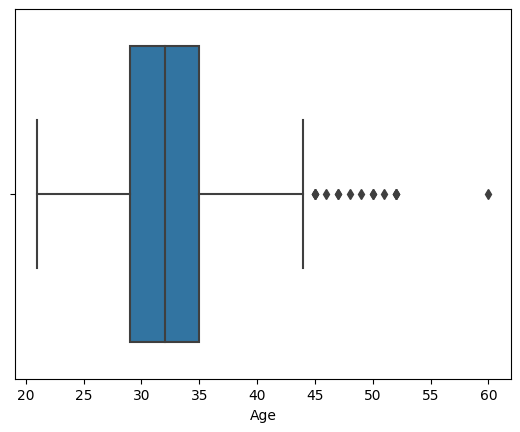

In [9]:
sns.boxplot(x = data_2018['Age'])
plt.show()

Mengelompokkan data dan memasukkan pada kolom baru serta untuk null values diisi dengan 'Unknown'.

In [10]:
def age(x):
    if x < 20:
        return '<20'
    elif x >= 20 and x < 30:
        return '[20,30)'
    elif x >= 30 and x < 40:
        return '[30,40)'
    elif x >= 40 and x < 50:
        return '[40,50)'
    elif x >= 50 and x < 60:
        return '[50,60)'
    elif x >= 60:
        return '>=60'
    else:
        return 'Unknown'
data_2018['Age category'] = data_2018['Age'].apply(lambda x: age(x))

Melihat banyaknya data dari masing-masing value pada `Age category`.

In [11]:
data_2018['Timestamp'].groupby(data_2018['Age category']).count()

Age category
>=60         1
Unknown     93
[20,30)    185
[30,40)    435
[40,50)     45
[50,60)      6
Name: Timestamp, dtype: int64

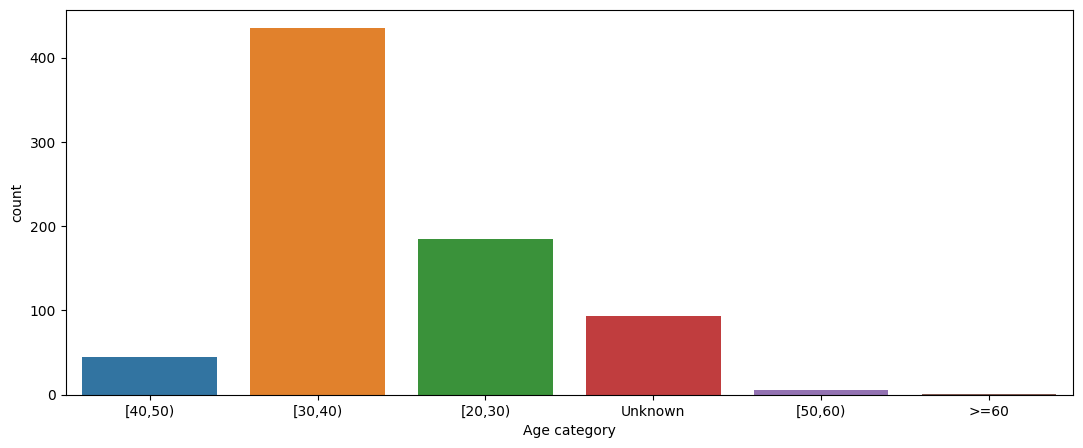

In [12]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2018['Age category'])
plt.show()

## Kolom `Gender`

Melihat value pada `Gender`.

In [13]:
data_2018['Gender'].unique()

array(['M', 'F', nan], dtype=object)

Mengisi null values pada `Gender` dengan 'Unknown'.

In [14]:
data_2018['Gender'] = data_2018['Gender'].fillna('Unknown')

Mengganti value 'F' menjadi 'Female' dan 'M' menjadi 'Male'.

In [15]:
def gender(x):
    if x == 'F':
        return 'Female'
    elif x == 'M':
        return 'Male'
    else:
        return x
data_2018['Gender'] = data_2018['Gender'].apply(lambda x: gender(x))

Melihat banyaknya data dari masing-masing value pada `Gender`.

In [16]:
data_2018['Timestamp'].groupby(data_2018['Gender']).count()

Gender
Female     105
Male       646
Unknown     14
Name: Timestamp, dtype: int64

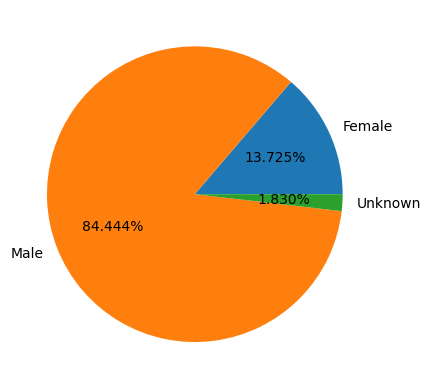

In [17]:
gender_2018 = pd.DataFrame(data_2018['Timestamp'].groupby(data_2018['Gender']).count().reset_index())
plt.pie(gender_2018['Timestamp'], labels = gender_2018['Gender'], autopct = '%1.3f%%')
plt.show()

## Kolom `City`

Melihat value pada `City`.

In [18]:
data_2018['City'].unique()

array(['München', 'Berlin', 'Karlsruhe', 'Hamburg', 'Augsburg ', 'Bremen',
       'Frankfurt', nan, 'Regensburg', 'Lisbon', 'Leipzig', 'Stuttgart',
       'Amsterdam', 'Luxembourg', 'Bern', 'Bonn', 'Köln',
       'Baden-Württemberg ', 'Frankonia', 'Stuttgart ', 'Mannheim ',
       'Bayern', 'Tübingen', 'Brno', 'Dresden', 'Krakow', 'Dublin',
       'Eindhoven', 'Amsterdam ', 'Konstanz', 'Dublin ', 'Prague',
       'Moscow', 'Stockholm', 'Belgrade, Serbia', 'Kyiv', 'Nürnberg',
       'Karlskrona', 'Krakau', 'Vienna', 'London', 'Bitburg', 'Gdansk',
       'Poland', 'Düsseldorf', 'Ludwigsburg', 'Essen', 'Strasbourg',
       'Alicante, Spain', 'Warsaw', 'Memmingen', 'Tallinn', 'Zurich',
       'oslo', 'Münster', 'Hildesheim', 'Krakow, Poland', 'Rosenheim',
       'Darmstadt', 'bremen', 'Brussels', 'Nürnberg ',
       'Schleswig-Holstein', 'Riga', 'Koblenz', 'homeoffice', 'Limassol',
       'saint petersburg', 'Erlangen', 'Siegen', 'Remote Germany',
       'Ireland, Dublin', 'Oberhausen', 'e

Mengisi null values pada `City` dengan 'Unknown'.

In [19]:
data_2018['City'] = data_2018['City'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `City` dengan top 20.

In [20]:
data_2018['Timestamp'].groupby(data_2018['City']).count().sort_values(ascending = False).head(20)

City
Berlin        291
München       249
Frankfurt      33
Unknown        29
Köln           20
Hamburg        16
Amsterdam      15
Stuttgart      15
London          4
Krakow          4
Karlsruhe       4
Dublin          4
Luxembourg      4
Stockholm       3
Nürnberg        3
Stuttgart       3
Amsterdam       2
Tallinn         2
Nürnberg        2
Moscow          2
Name: Timestamp, dtype: int64

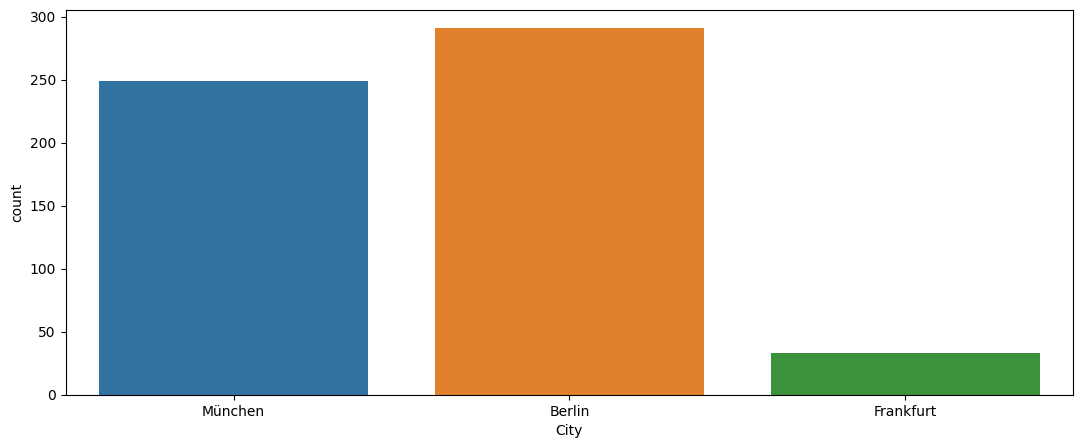

In [21]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2018[(data_2018['City'] == 'Berlin') | (data_2018['City'] == 'München') |
                            (data_2018['City'] == 'Frankfurt')]['City'])
plt.show()

## Kolom `Position`

Melihat value pada `Position`.

In [22]:
data_2018['Position'].unique()

array(['QA Ingenieur', 'Senior PHP Magento developer ',
       'Software Engineer', 'Senior Frontend Developer', 'UX Designer',
       'Project Manager', 'Senior Android Developer',
       'Data science team lead', 'Test Automation Engineer',
       'Frontend Developer', 'Senior Full-stack .Net Developer',
       'QA Lead', 'Front-end engineer', 'Software Developer',
       'QA Test Engineer', 'QA Manager', 'CTO', 'Cloud Consulting', 'QA',
       'Frontend Engineer', 'Head of IT', 'Senior Software Engineer',
       'Operations manager', 'Product Manager',
       'Software engineer ( React/React-native )', 'iOS Developer ',
       'Senior DevOps', 'C# Developer', 'ERP/BI Specialist',
       'Full stack developer', 'Systems Administrator',
       'Senior Software Developer', 'C++ developer', 'PM',
       'Android Developer', 'Software Architect',
       'Embedded Software Engineer', 'iOS developer', 'Data Engineer',
       'iOS Developer', 'PHP Developer', 'Ruby developer',
       'Embed

Melihat banyaknya data dari masing-masing value pada `Position`.

In [23]:
data_2018['Timestamp'].groupby(data_2018['Position']).count().sort_values(ascending = False)

Position
Java Developer              34
Software Engineer           29
Senior Software Engineer    16
QA                          15
Frontend Developer          13
                            ..
Java Developer junior        1
Java & JS Developer          1
It security                  1
IT-Consultant                1
webdev                       1
Name: Timestamp, Length: 397, dtype: int64

Karena banyaknya value yang berbeda dan sulit untuk dikelompokkan maka untuk saat ini kolom `Position` tidak digunakan.

In [24]:
data_2018 = data_2018.drop(['Position'], axis = 1)
data_2018.head()

,Timestamp,Age,Gender,City,Years of experience,Your level,Current Salary,Main language at work,Company size,Company type,Age category
0,14/12/2018 12:41:33,43.0,Male,München,11.0,Senior,77000.0,Deutsch,100-1000,Product,"[40,50)"
1,14/12/2018 12:42:09,33.0,Female,München,8.0,Senior,65000.0,Deutsch,50-100,Product,"[30,40)"
2,14/12/2018 12:47:36,32.0,Male,München,10.0,Senior,88000.0,Deutsch,1000+,Product,"[30,40)"
3,14/12/2018 12:50:15,25.0,Male,München,6.0,Senior,78000.0,English,1000+,Product,"[20,30)"
4,14/12/2018 12:50:31,39.0,Male,München,10.0,Senior,69000.0,English,100-1000,Ecom retailer,"[30,40)"


## Kolom `Years of experience`

Melihat distribusi data dari `Years of experience`.

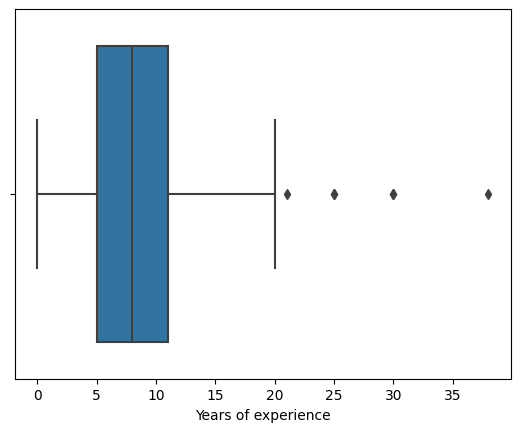

In [25]:
sns.boxplot(x = data_2018['Years of experience'])
plt.show()

Mengelompokkan data dan memasukkannya pada kolom baru serta untuk null values diisi dengan 'Unknown'.

In [26]:
def experience(x):
    if x < 5:
        return '<5'
    elif x >= 5 and x < 10:
        return '[5,10)'
    elif x >= 10 and x < 20:
        return '[10,20)'
    elif x >= 20 and x < 30:
        return '[20,30)'
    elif x >= 30:
        return '>=30'
    else:
        return 'Unknown'
data_2018['Years of experience category'] = data_2018['Years of experience'].apply(lambda x: experience(x))

Melihat banyaknya data dari masing-masing value pada `Years of experience category`.

In [27]:
data_2018['Timestamp'].groupby(data_2018['Years of experience category']).count()

Years of experience category
<5         136
>=30         3
Unknown     33
[10,20)    279
[20,30)     18
[5,10)     296
Name: Timestamp, dtype: int64

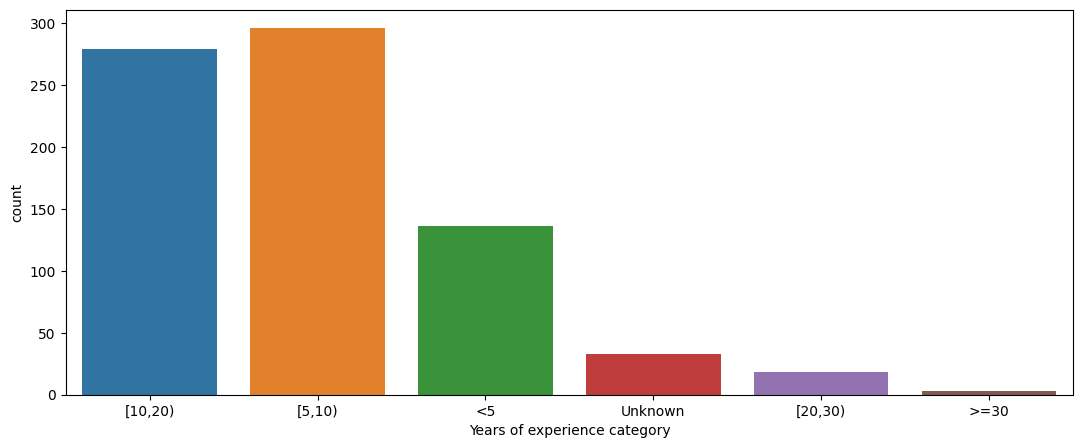

In [28]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2018['Years of experience category'])
plt.show()

## Kolom `Your level`

Melihat value pada `Your level`.

In [29]:
data_2018['Your level'].unique()

array(['Senior', 'Middle', 'Junior', nan], dtype=object)

Mengisi null values pada `Your level` dengan 'Unknown'.

In [30]:
data_2018['Your level'] = data_2018['Your level'].fillna('Unknown')

Rename `Your level` menjadi `Level`.

In [31]:
data_2018 = data_2018.rename(columns = {'Your level': 'Level'})
data_2018.head()

,Timestamp,Age,Gender,City,Years of experience,Level,Current Salary,Main language at work,Company size,Company type,Age category,Years of experience category
0,14/12/2018 12:41:33,43.0,Male,München,11.0,Senior,77000.0,Deutsch,100-1000,Product,"[40,50)","[10,20)"
1,14/12/2018 12:42:09,33.0,Female,München,8.0,Senior,65000.0,Deutsch,50-100,Product,"[30,40)","[5,10)"
2,14/12/2018 12:47:36,32.0,Male,München,10.0,Senior,88000.0,Deutsch,1000+,Product,"[30,40)","[10,20)"
3,14/12/2018 12:50:15,25.0,Male,München,6.0,Senior,78000.0,English,1000+,Product,"[20,30)","[5,10)"
4,14/12/2018 12:50:31,39.0,Male,München,10.0,Senior,69000.0,English,100-1000,Ecom retailer,"[30,40)","[10,20)"


Melihat banyaknya data dari masing-masing value pada `Level`.

In [32]:
data_2018['Timestamp'].groupby(data_2018['Level']).count().sort_values(ascending = False)

Level
Senior     497
Middle     206
Junior      40
Unknown     22
Name: Timestamp, dtype: int64

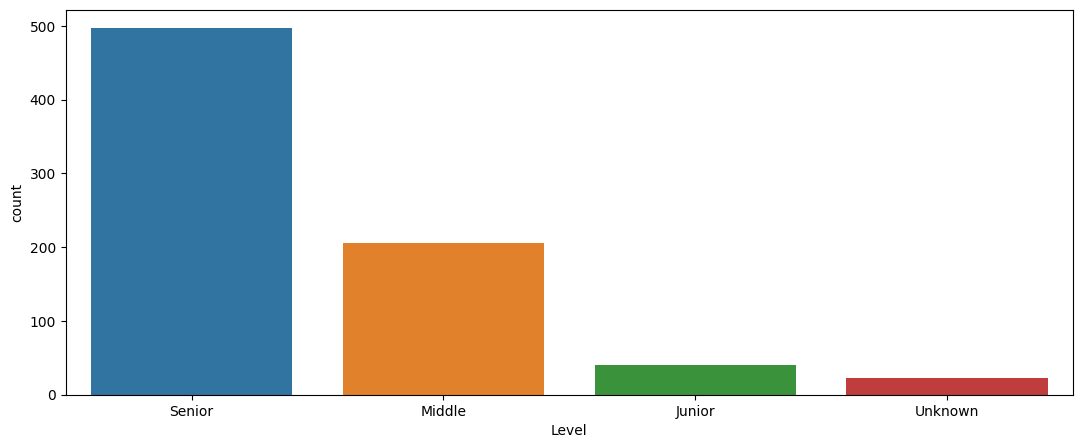

In [33]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2018['Level'])
plt.show()

## Kolom `Current Salary`

Melihat distribusi data dari `Current Salary`.

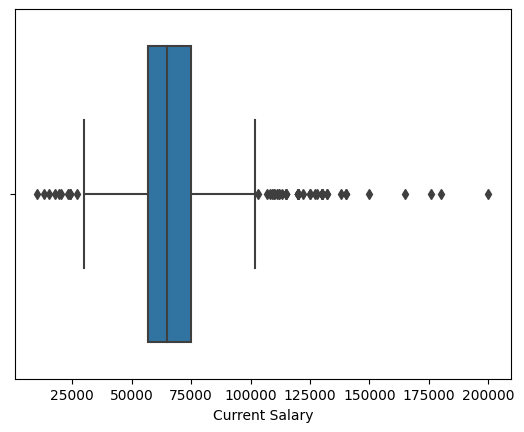

In [34]:
sns.boxplot(x = data_2018['Current Salary'])
plt.show()

Rename `Current Salary` menjadi `Salary (EUR)`.

In [35]:
data_2018 = data_2018.rename(columns = {'Current Salary': 'Salary (EUR)'})
data_2018.head()

,Timestamp,Age,Gender,City,Years of experience,Level,Salary (EUR),Main language at work,Company size,Company type,Age category,Years of experience category
0,14/12/2018 12:41:33,43.0,Male,München,11.0,Senior,77000.0,Deutsch,100-1000,Product,"[40,50)","[10,20)"
1,14/12/2018 12:42:09,33.0,Female,München,8.0,Senior,65000.0,Deutsch,50-100,Product,"[30,40)","[5,10)"
2,14/12/2018 12:47:36,32.0,Male,München,10.0,Senior,88000.0,Deutsch,1000+,Product,"[30,40)","[10,20)"
3,14/12/2018 12:50:15,25.0,Male,München,6.0,Senior,78000.0,English,1000+,Product,"[20,30)","[5,10)"
4,14/12/2018 12:50:31,39.0,Male,München,10.0,Senior,69000.0,English,100-1000,Ecom retailer,"[30,40)","[10,20)"


Mengelompokkan data dan memasukkannya pada kolom baru serta untuk null values diisi dengan 'Unknown'.

In [36]:
def salary(x):
    if x < 20000:
        return '<20000'
    elif x >= 20000 and x < 50000:
        return '[20000,50000)'
    elif x >= 50000 and x < 100000:
        return '[50000,100000)'
    elif x >= 100000 and x < 150000:
        return '[100000,150000)'
    elif x >= 150000 and x < 200000:
        return '[150000,200000)'
    elif x >= 200000:
        return '>=200000'
    else:
        return 'Unknown'
data_2018['Salary (EUR) category'] = data_2018['Salary (EUR)'].apply(lambda x: salary(x))

Melihat banyaknya data dari masing-masing value pada `Salary (EUR) category`.

In [37]:
data_2018['Timestamp'].groupby(data_2018['Salary (EUR) category']).count()

Salary (EUR) category
<20000               5
>=200000             1
Unknown             15
[100000,150000)     44
[150000,200000)      4
[20000,50000)       85
[50000,100000)     611
Name: Timestamp, dtype: int64

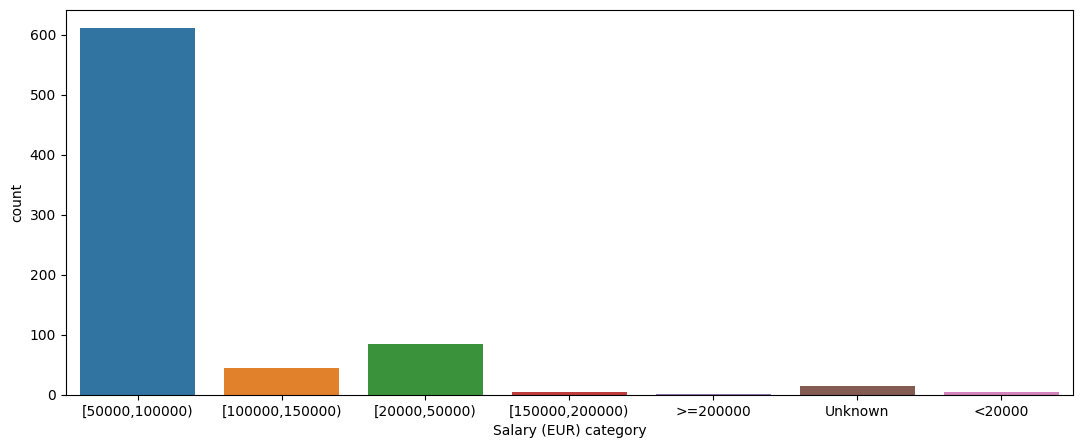

In [38]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2018['Salary (EUR) category'])
plt.show()

## Kolom `Main language at work`

Melihat value pada `Main language at work`.

In [39]:
data_2018['Main language at work'].unique()

array(['Deutsch', 'English', 'Russian', 'French',
       'Team - Russian; Cross-team - English;', 'Polish', nan,
       'Deutsch/Englisch'], dtype=object)

Mengisi null values pada `Main language at work` dengan 'Unknown'.

In [40]:
data_2018['Main language at work'] = data_2018['Main language at work'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Main language at work`.

In [41]:
data_2018['Timestamp'].groupby(data_2018['Main language at work']).count().sort_values(ascending = False)

Main language at work
English                                  581
Deutsch                                  134
Russian                                   29
Unknown                                   15
French                                     2
Polish                                     2
Deutsch/Englisch                           1
Team - Russian; Cross-team - English;      1
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [42]:
def language(x):
    if x == 'English' or x == 'Unknown':
        return x
    elif x == 'Deutsch':
        return 'German'
    elif x == 'Deutsch/Englisch' or x == 'Team - Russian; Cross-team - English;':
        return 'English'
    else:
        return 'Other'
data_2018['Main language at work'] = data_2018['Main language at work'].apply(lambda x: language(x))

Melihat banyaknya data dari masing-masing value pada `Main language at work` setelah dikelompokkan.

In [43]:
data_2018['Timestamp'].groupby(data_2018['Main language at work']).count().sort_values(ascending = False)

Main language at work
English    583
German     134
Other       33
Unknown     15
Name: Timestamp, dtype: int64

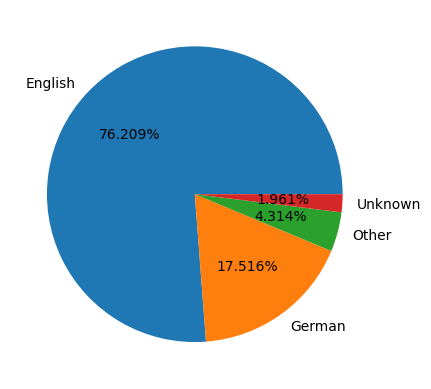

In [44]:
language_2018 = pd.DataFrame(data_2018['Timestamp'].groupby(data_2018['Main language at work'])
                             .count().reset_index())
plt.pie(language_2018['Timestamp'], labels = language_2018['Main language at work'], autopct = '%1.3f%%')
plt.show()

## Kolom `Company size`

Melihat value pada `Company size`.

In [45]:
data_2018['Company size'].unique()

array(['100-1000', '50-100', '1000+', '10-50', 'up to 10', nan],
      dtype=object)

Mengisi null values pada `Company size` dengan 'Unknown'.

In [46]:
data_2018['Company size'] = data_2018['Company size'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Company size`.

In [47]:
data_2018['Timestamp'].groupby(data_2018['Company size']).count().sort_values(ascending = False)

Company size
100-1000    260
1000+       219
50-100      120
10-50       117
up to 10     34
Unknown      15
Name: Timestamp, dtype: int64

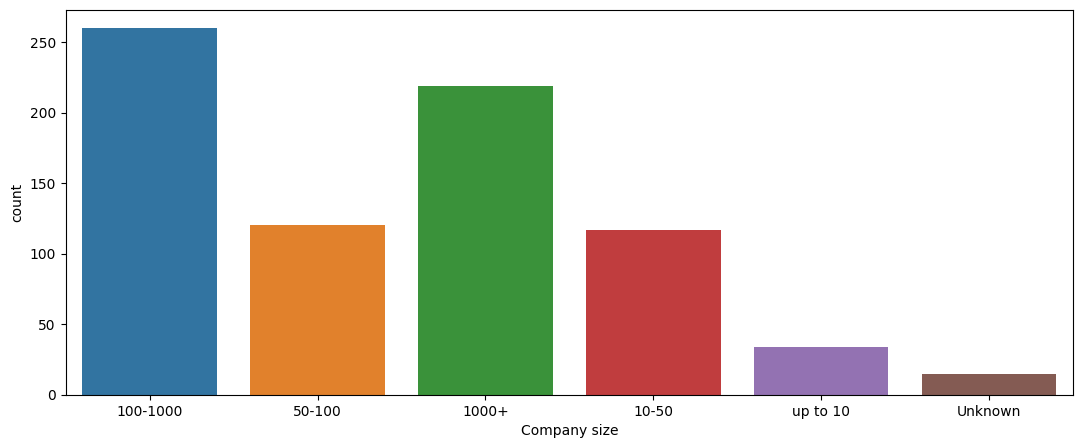

In [48]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2018['Company size'])
plt.show()

## Kolom `Company type`

Melihat value pada `Company type`.

In [49]:
data_2018['Company type'].unique()

array(['Product', 'Ecom retailer', 'Insurance', nan, 'Startup', 'Agency',
       'Big Tech', 'Consultancy', 'Corporation', 'Outsource', 'Industry',
       'E-Commerce firm', 'Consulting',
       'Internal development for a non-IT company',
       'Personaldienstleister', 'ipo', 'e-commerce',
       'Product and Projects', 'E-Commerce', 'Development',
       'Consulting Company', 'IT Dienstleistungen ', 'Manufacturing',
       'Stock market ', 'telecom operator', 'Ecommerce', 'Outsourcing',
       'Outsorce', 'consulting', 'GmbH', 'IT Consulting ',
       'IT Consultancy ', 'IT Service Provider', 'non-IT, manufacturing',
       'Bank ', 'IT-Beratung', 'Technology Consulting', 'outsource',
       'IT Consultants', 'Hochschule/university', 'ISP', 'Fin Tech',
       'Blockchain technology', 'Retail', 'Consult',
       'Project-based software development', 'Automotive', 'OEM',
       'Consulting (banking)', 'IT Consulting'], dtype=object)

Mengisi null values pada `Company type` dengan 'Unknown'.

In [50]:
data_2018['Company type'] = data_2018['Company type'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Company type`.

In [51]:
data_2018['Timestamp'].groupby(data_2018['Company type']).count().sort_values(ascending = False)

Company type
Product                                      451
Startup                                      145
Agency                                        74
Unknown                                       35
Consulting                                     5
Outsource                                      5
Outsourcing                                    3
Insurance                                      2
Automotive                                     2
Consultancy                                    2
Corporation                                    2
outsource                                      1
Internal development for a non-IT company      1
Manufacturing                                  1
OEM                                            1
Outsorce                                       1
Personaldienstleister                          1
non-IT, manufacturing                          1
Product and Projects                           1
ipo                                            1
Retail 

Mengelompokkan data.

In [52]:
def company_type(x):
    if x == 'Product' or x == 'Startup' or x == 'Unknown':
        return x
    elif (x == 'Agency' or x == 'Consulting' or x == 'Consultancy' or x == 'Technology Consulting'
          or x == 'consulting' or x == 'Consult' or x == 'Consulting (banking)' or x == 'Consulting Company'
          or x == 'IT Consultancy ' or x == 'IT Consultants' or x == 'IT Consulting' or x == 'IT Consulting '):
        return 'Consulting / Agency'
    elif x == 'Product and Projects':
        return 'Product'
    else:
        return 'Other'
data_2018['Company type'] = data_2018['Company type'].apply(lambda x: company_type(x))

Melihat banyaknya data dari masing-masing value pada `Company type` setelah dikelompokkan.

In [53]:
data_2018['Timestamp'].groupby(data_2018['Company type']).count().sort_values(ascending = False)

Company type
Product                452
Startup                145
Consulting / Agency     90
Other                   43
Unknown                 35
Name: Timestamp, dtype: int64

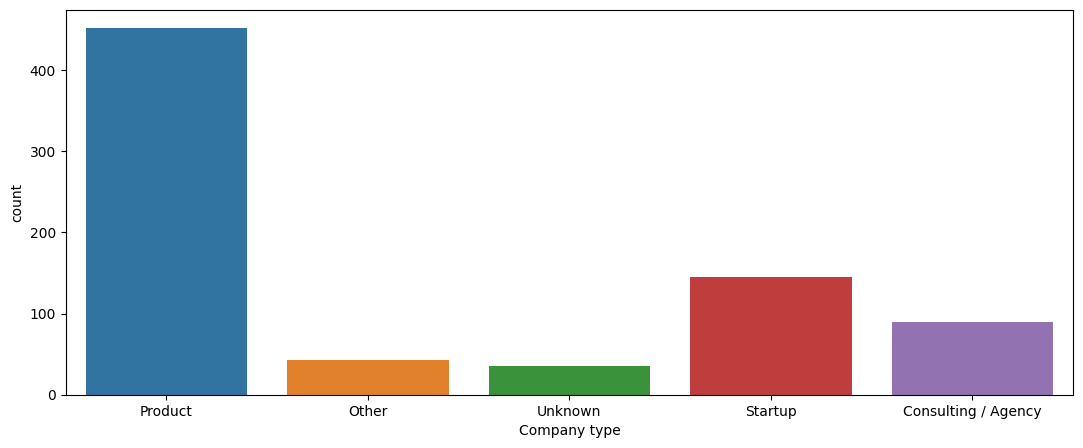

In [54]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2018['Company type'])
plt.show()

## Lain-lain

Meninjau kembali null values dari `data_2018`.

In [55]:
data_2018.isna().sum()

Timestamp                        0
Age                             93
Gender                           0
City                             0
Years of experience             33
Level                            0
Salary (EUR)                    15
Main language at work            0
Company size                     0
Company type                     0
Age category                     0
Years of experience category     0
Salary (EUR) category            0
dtype: int64

Null values pada `Age`, `Years of experience`, dan `Salary (EUR)` diabaikan karena jika diisi dengan nilai lain dapat mengganggu analisis.

# Data 2019

In [56]:
data_2019.shape

(991, 23)

`data_2019` terdiri dari 991 baris dan 23 kolom.

Melihat preview `data_2019`.

In [57]:
data_2019.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


Menampilkan informasi dari `data_2019`.

In [58]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   882 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       97

Meninjau duplicate data dari `data_2019`.

In [59]:
data_2019.duplicated().sum()

0

Meninjau null values dari `data_2019`.

In [60]:
data_2019.isna().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

Menghapus kolom yang memuat banyak null values dan tidak akan digunakan.

In [61]:
data_2019 = data_2019.drop(['Yearly bonus', 'Yearly stocks',
                            'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
                            'Yearly bonus one year ago. Only answer if staying in same country',
                            'Yearly stocks one year ago. Only answer if staying in same country',
                            'Number of vacation days', 'Number of home office days per month', 'Company name ',
                            'Company business sector', '0'], axis = 1)
data_2019.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Main language at work,Company size,Company type,Сontract duration
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,English,50-100,Startup,unlimited
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,English,10-50,Product,unlimited
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,English,1000+,Startup,unlimited
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,English,100-1000,Product,unlimited
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,English,50-100,Product,unlimited


## Kolom `Zeitstempel`

Rename `Zeitstempel` menjadi `Timestamp`.

In [62]:
data_2019 = data_2019.rename(columns = {'Zeitstempel': 'Timestamp'})

In [63]:
data_2019['Timestamp'] = data_2019['Timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y %H:%M:%S')
                                                      .strftime('%d/%m/%Y %H:%M:%S'))
data_2019.head()

,Timestamp,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Main language at work,Company size,Company type,Сontract duration
0,02/12/2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,English,50-100,Startup,unlimited
1,02/12/2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,English,10-50,Product,unlimited
2,02/12/2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,English,1000+,Startup,unlimited
3,02/12/2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,English,100-1000,Product,unlimited
4,02/12/2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,English,50-100,Product,unlimited


## Kolom `Age`

Melihat distribusi data dari `Age`.

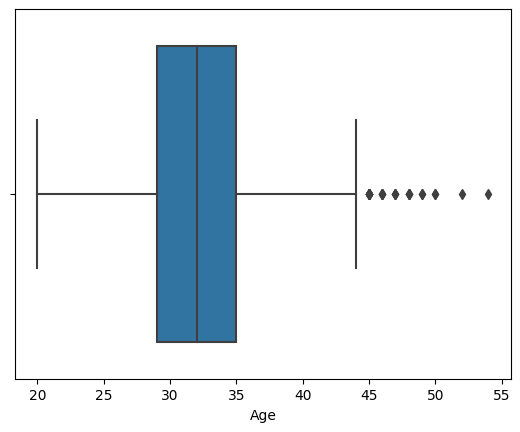

In [64]:
sns.boxplot(x = data_2019['Age'])
plt.show()

Mengelompokkan data dan memasukkan pada kolom baru serta untuk null values diisi dengan 'Unknown'.

In [65]:
def age(x):
    if x < 20:
        return '<20'
    elif x >= 20 and x < 30:
        return '[20,30)'
    elif x >= 30 and x < 40:
        return '[30,40)'
    elif x >= 40 and x < 50:
        return '[40,50)'
    elif x >= 50 and x < 60:
        return '[50,60)'
    elif x >= 60:
        return '>=60'
    else:
        return 'Unknown'
data_2019['Age category'] = data_2019['Age'].apply(lambda x: age(x))

Melihat banyaknya data dari masing-masing value pada `Age category`.

In [66]:
data_2019['Timestamp'].groupby(data_2019['Age category']).count()

Age category
Unknown    109
[20,30)    262
[30,40)    531
[40,50)     85
[50,60)      4
Name: Timestamp, dtype: int64

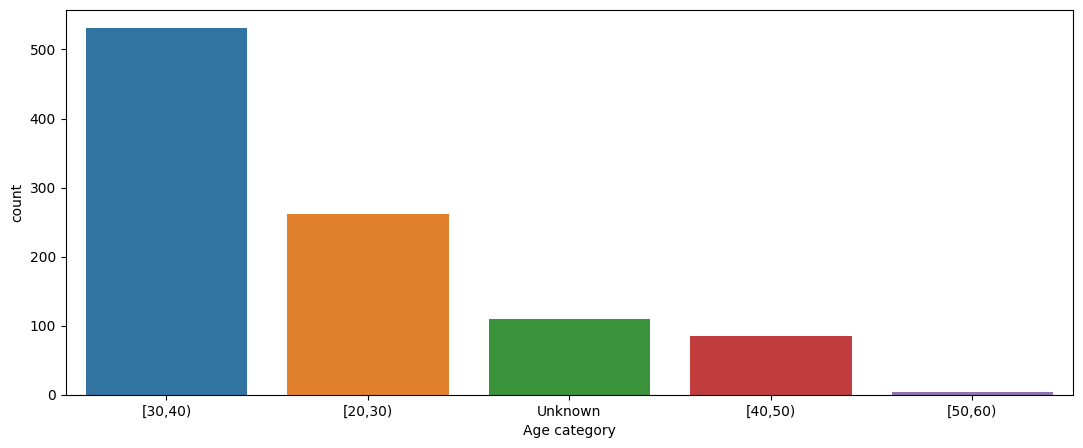

In [67]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019['Age category'])
plt.show()

## Kolom `Gender`

Melihat value pada `Gender`.

In [68]:
data_2019['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Melihat banyaknya data dari masing-masing value pada `Gender`.

In [69]:
data_2019['Timestamp'].groupby(data_2019['Gender']).count()

Gender
Female    153
Male      838
Name: Timestamp, dtype: int64

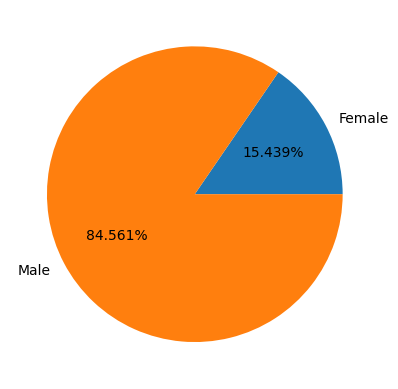

In [70]:
gender_2019 = pd.DataFrame(data_2019['Timestamp'].groupby(data_2019['Gender']).count().reset_index())
plt.pie(gender_2019['Timestamp'], labels = gender_2019['Gender'], autopct = '%1.3f%%')
plt.show()

## Kolom `City`

Melihat value pada `City`.

In [71]:
data_2019['City'].unique()

array(['Berlin', 'Hamburg', 'Frankfurt', 'Munich', 'Cologne',
       'Düsseldorf', 'Wolfsburg', 'MA', 'Leipzig', 'Nuremberg', 'Krakow',
       'Prague', 'Wroclaw', 'Stuttgart', 'London', 'Karlsruhe',
       'Ingolstadt', 'Riga', 'Bern', 'Moscow', 'Darmstadt', 'Dusseldorf',
       'Kyiv', 'Freiburg', 'Amsterdam', 'Vienna', 'Pforzheim', 'Kassel ',
       'Madrid', 'Marburg', 'Warsaw', 'Hannover', 'Paris', 'Milan',
       'Odesa', 'Cork', 'Zug', 'Heidelberg', 'Brussels', 'Bielefeld',
       'Dublin', 'Jyvaskyla', 'Toulouse', 'Dubai', 'Zurich', 'Lingen',
       'Dresden', 'Lugano', 'Walldorf', 'Schleswig-Holstein',
       'Braunschweig', 'Kaiserslautern', 'Eindhoven', 'Saint Petersburg',
       'Eindhoven ', 'Leeuwarden', 'Hilversum', 'Gdańsk', 'Gothenburg',
       'Almere', 'Limassol', 'Stockholm', 'Tampere', 'Bayern',
       'Rotterdam', 'Antwerpen', 'Tallinn', 'Koblenz', 'Würzburg ',
       'Bremen', 'Lausanne', 'Nizhny Novgorod ', 'Saint-Petersburg ',
       'Minsk', 'Utrecht', 'Kiev']

Melihat banyaknya data dari masing-masing value pada `City` dengan top 20.

In [72]:
data_2019['Timestamp'].groupby(data_2019['City']).count().sort_values(ascending = False).head(20)

City
Berlin        430
Munich        240
Amsterdam      80
Frankfurt      50
Hamburg        34
Cologne        16
Stuttgart      15
Moscow         11
Düsseldorf     10
Kyiv            9
Nuremberg       6
Warsaw          5
London          5
Zurich          4
Vienna          3
Karlsruhe       3
Eindhoven       3
Rotterdam       2
Paris           2
Heidelberg      2
Name: Timestamp, dtype: int64

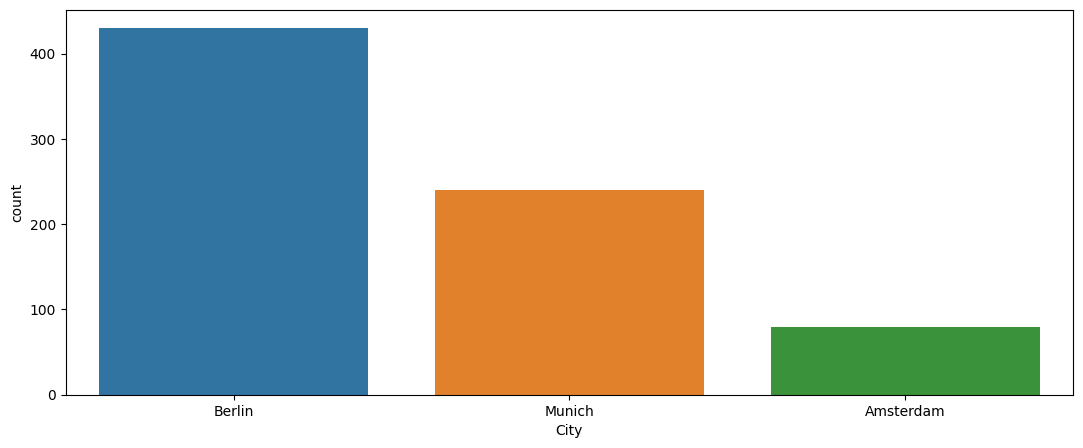

In [73]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019[(data_2019['City'] == 'Berlin') | (data_2019['City'] == 'Munich') |
                            (data_2019['City'] == 'Amsterdam')]['City'])
plt.show()

## Kolom `Seniority level`

Melihat value pada `Seniority level`.

In [74]:
data_2019['Seniority level'].unique()

array(['Senior', 'Middle', 'Head', 'Lead', nan, 'Junior', 'Principal'],
      dtype=object)

Mengisi null values pada `Seniority level` dengan 'Unknown'.

In [75]:
data_2019['Seniority level'] = data_2019['Seniority level'].fillna('Unknown')

Rename `Seniority level` menjadi `Level`.

In [76]:
data_2019 = data_2019.rename(columns = {'Seniority level': 'Level'})
data_2019.head()

,Timestamp,Age,Gender,City,Level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Main language at work,Company size,Company type,Сontract duration,Age category
0,02/12/2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,English,50-100,Startup,unlimited,"[30,40)"
1,02/12/2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,English,10-50,Product,unlimited,"[20,30)"
2,02/12/2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,English,1000+,Startup,unlimited,Unknown
3,02/12/2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,English,100-1000,Product,unlimited,"[30,40)"
4,02/12/2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,English,50-100,Product,unlimited,"[30,40)"


Melihat banyaknya data dari masing-masing value pada `Level`.

In [77]:
data_2019['Timestamp'].groupby(data_2019['Level']).count().sort_values(ascending = False)

Level
Senior       587
Middle       272
Junior        73
Lead          35
Unknown       15
Head           6
Principal      3
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [78]:
data_2019['Level'] = data_2019['Level'].apply(lambda x: 'Head' if x == 'Principal' else x)

Melihat banyaknya data dari masing-masing value pada `Level` setelah dikelompokkan.

In [79]:
data_2019['Timestamp'].groupby(data_2019['Level']).count().sort_values(ascending = False)

Level
Senior     587
Middle     272
Junior      73
Lead        35
Unknown     15
Head         9
Name: Timestamp, dtype: int64

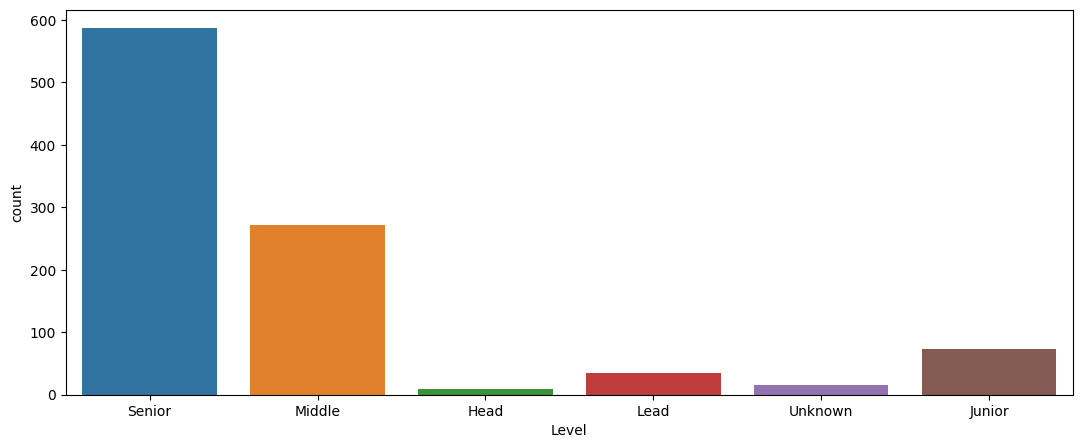

In [80]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019['Level'])
plt.show()

## Kolom `Position (without seniority)`

Melihat value pada `Position (without seniority)`.

In [81]:
data_2019['Position (without seniority)'].unique()

array(['Fullstack Developer', 'Backend Developer', 'Mobile Developer',
       'Embedded Developer', 'Machine Learning Engineer', 'Manager',
       'DevOps', 'Designer (UI, UX)', 'Frontend Developer',
       'Data Scientist', 'Data Engineer', 'QA', 'Software Architect',
       'Business Analyst', 'Localization', 'Support',
       'System Administrator', 'Product Manager', 'SAP Consultant', 'SRE',
       'Software Engineer', 'CTO (CEO, CFO)', 'Database Developer (DBA)',
       'Desktop/Unity3D Developer', 'Recruiter ', 'Researcher', nan,
       'Cloud Platform Engineer', 'Lawyer ', 'IT Security',
       'Sales Engineer', 'Mainframe', 'Network Engineer', 'NLP Engineer',
       'Head of AI', 'Head of Engineering', 'Tech Lead',
       'Crypto Developer', 'Modelling Specialist', 'RPA developer',
       'Platform Engineer', 'UX Researcher', 'Game Developer',
       'Backend Developer & Team Lead', 'support', 'DevOps Manager',
       'Solution Architect', 'Scrum Master', 'Data Analyst', 'Deskt

Mengisi null values pada `Position (without seniority)` dengan 'Unknown'.

In [82]:
data_2019['Position (without seniority)'] = data_2019['Position (without seniority)'].fillna('Unknown')

Rename `Position (without seniority)` menjadi `Position`.

In [83]:
data_2019 = data_2019.rename(columns = {'Position (without seniority)': 'Position'})
data_2019.head()

,Timestamp,Age,Gender,City,Level,Position,Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Main language at work,Company size,Company type,Сontract duration,Age category
0,02/12/2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,English,50-100,Startup,unlimited,"[30,40)"
1,02/12/2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,English,10-50,Product,unlimited,"[20,30)"
2,02/12/2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,English,1000+,Startup,unlimited,Unknown
3,02/12/2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,English,100-1000,Product,unlimited,"[30,40)"
4,02/12/2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,English,50-100,Product,unlimited,"[30,40)"


Melihat banyaknya data dari masing-masing value pada `Position`.

In [84]:
data_2019['Timestamp'].groupby(data_2019['Position']).count().sort_values(ascending = False)

Position
Backend Developer                253
Data Scientist                   122
Fullstack Developer               78
Frontend Developer                68
Manager                           63
QA                                56
DevOps                            53
Mobile Developer                  46
Data Engineer                     39
Software Architect                36
Machine Learning Engineer         33
Business Analyst                  17
Embedded Developer                14
Researcher                        12
SAP Consultant                    10
SRE                               10
Product Manager                    9
Software Engineer                  7
CTO (CEO, CFO)                     7
System Administrator               7
Cloud Platform Engineer            5
Support                            4
Designer (UI, UX)                  4
Tech Lead                          3
Database Developer (DBA)           3
Network Engineer                   3
Platform Engineer            

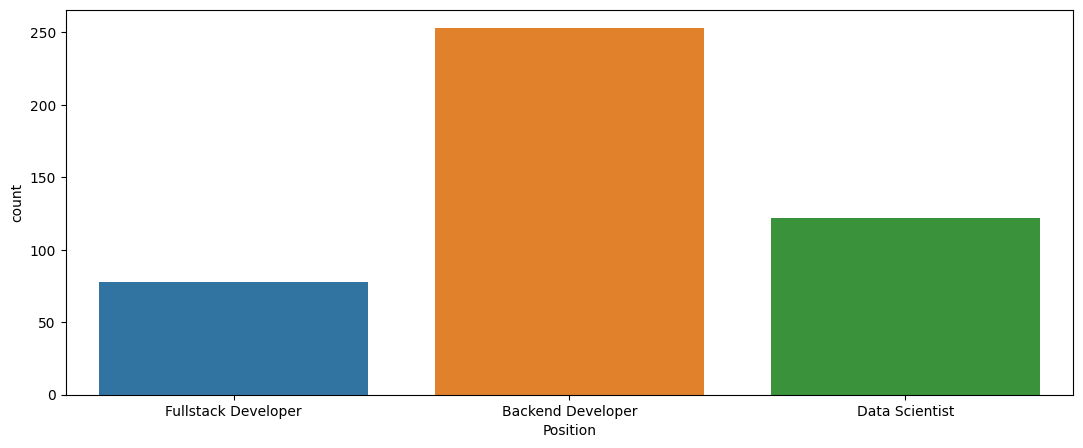

In [85]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019[(data_2019['Position'] == 'Backend Developer') |
                            (data_2019['Position'] == 'Data Scientist') |
                            (data_2019['Position'] == 'Fullstack Developer')]['Position'])
plt.show()

## Kolom `Years of experience`

Melihat distribusi data dari `Years of experience`.

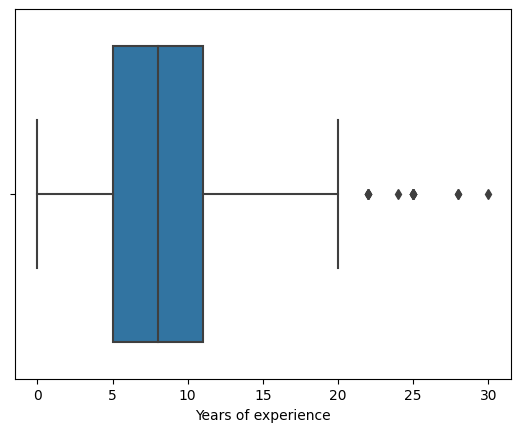

In [86]:
sns.boxplot(x = data_2019['Years of experience'])
plt.show()

Mengelompokkan data dan memasukkannya pada kolom baru.

In [87]:
def experience(x):
    if x < 5:
        return '<5'
    elif x >= 5 and x < 10:
        return '[5,10)'
    elif x >= 10 and x < 20:
        return '[10,20)'
    elif x >= 20 and x < 30:
        return '[20,30)'
    else:
        return '>=30'
data_2019['Years of experience category'] = data_2019['Years of experience'].apply(lambda x: experience(x))

Melihat banyaknya data dari masing-masing value pada `Years of experience category`.

In [88]:
data_2019['Timestamp'].groupby(data_2019['Years of experience category']).count()

Years of experience category
<5         228
>=30         1
[10,20)    362
[20,30)     34
[5,10)     366
Name: Timestamp, dtype: int64

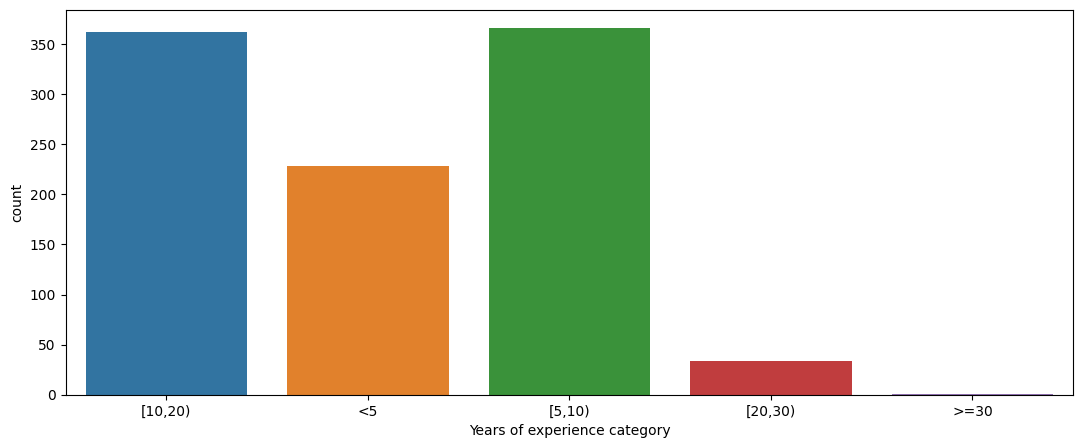

In [89]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019['Years of experience category'])
plt.show()

## Kolom `Your main technology / programming language`

Melihat value pada `Your main technology / programming language`.

In [90]:
data_2019['Your main technology / programming language'].unique()

array(['PHP', 'Python', 'Kotlin', 'C/C++', 'Java', 'Not Relevant',
       'Swift', 'Javascript / Typescript', 'Go', 'AWS', 'Kubernetes',
       'Ruby', '.NET', 'Scala', 'Clojure', nan, 'Yaml',
       'Linux-Stack, Networking', 'Azure', 'Elixir', 'Multiple',
       'Objective-C', 'Microsoft, Vmware', 'Google Cloud', 'SAP / ABAP',
       'SQL', 'R', 'SAS', 'Powershell', 'Rust', 'Solidity', 'ASM',
       'Cobol', 'Perl', 'Cisco', 'Hadoop', 'Erlang', 'Unity', 'HR', 'K8S',
       'ABAP', 'PostgreSQL', 'Openstack'], dtype=object)

Mengisi null values pada `Your main technology / programming language` dengan 'Unknown'.

In [91]:
data_2019['Your main technology / programming language'] = (data_2019['Your main technology / programming language']
                                                            .fillna('Unknown'))

Rename `Your main technology / programming language` menjadi `Main technology or programming language`.

In [92]:
data_2019 = data_2019.rename(columns = {'Your main technology / programming language':
                                        'Main technology or programming language'})
data_2019.head()

,Timestamp,Age,Gender,City,Level,Position,Years of experience,Main technology or programming language,Yearly brutto salary (without bonus and stocks),Main language at work,Company size,Company type,Сontract duration,Age category,Years of experience category
0,02/12/2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,English,50-100,Startup,unlimited,"[30,40)","[10,20)"
1,02/12/2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,English,10-50,Product,unlimited,"[20,30)",<5
2,02/12/2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,English,1000+,Startup,unlimited,Unknown,<5
3,02/12/2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,English,100-1000,Product,unlimited,"[30,40)","[5,10)"
4,02/12/2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,English,50-100,Product,unlimited,"[30,40)","[10,20)"


Melihat banyaknya data dari masing-masing value pada `Main technology or programming language`.

In [93]:
(data_2019['Timestamp'].groupby(data_2019['Main technology or programming language']).count()
 .sort_values(ascending = False))

Main technology or programming language
Python                     205
Java                       181
Not Relevant               119
Javascript / Typescript    107
PHP                         52
C/C++                       44
.NET                        41
AWS                         39
Kotlin                      34
R                           26
Swift                       20
Ruby                        20
Go                          15
Unknown                     14
SQL                         13
Scala                        9
Azure                        7
Google Cloud                 5
Kubernetes                   5
SAP / ABAP                   4
Rust                         3
Clojure                      2
Cisco                        2
Elixir                       2
SAS                          2
Objective-C                  2
Perl                         2
Unity                        1
Solidity                     1
Microsoft, Vmware            1
Powershell                   1

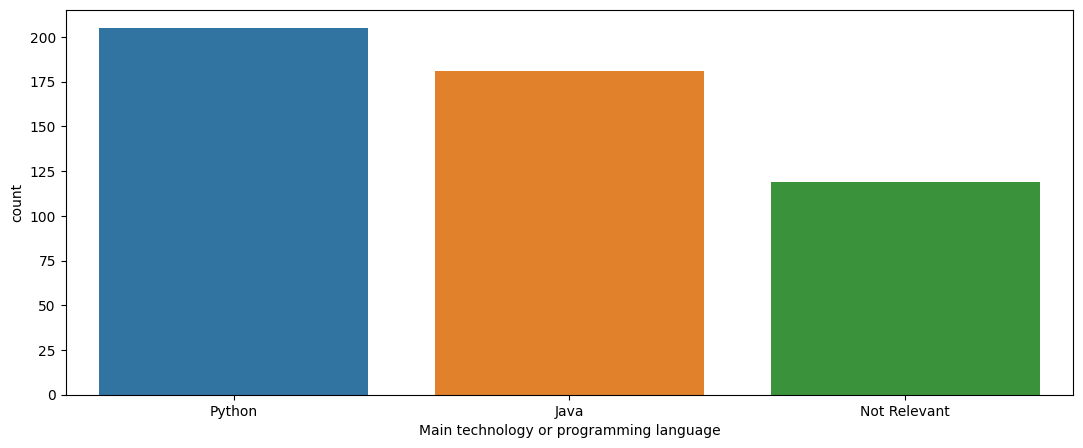

In [94]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019[(data_2019['Main technology or programming language'] == 'Python') |
                            (data_2019['Main technology or programming language'] == 'Java') |
                            (data_2019['Main technology or programming language'] == 'Not Relevant')]
              ['Main technology or programming language'])
plt.show()

## Kolom `Yearly brutto salary (without bonus and stocks)`

Melihat distribusi data dari `Yearly brutto salary (without bonus and stocks)`.

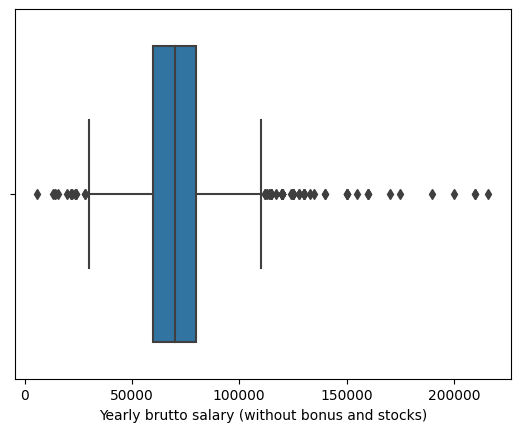

In [95]:
sns.boxplot(x = data_2019['Yearly brutto salary (without bonus and stocks)'])
plt.show()

Rename `Yearly brutto salary (without bonus and stocks)` menjadi `Salary (EUR)`.

In [96]:
data_2019 = data_2019.rename(columns = {'Yearly brutto salary (without bonus and stocks)': 'Salary (EUR)'})
data_2019.head()

,Timestamp,Age,Gender,City,Level,Position,Years of experience,Main technology or programming language,Salary (EUR),Main language at work,Company size,Company type,Сontract duration,Age category,Years of experience category
0,02/12/2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,English,50-100,Startup,unlimited,"[30,40)","[10,20)"
1,02/12/2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,English,10-50,Product,unlimited,"[20,30)",<5
2,02/12/2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,English,1000+,Startup,unlimited,Unknown,<5
3,02/12/2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,English,100-1000,Product,unlimited,"[30,40)","[5,10)"
4,02/12/2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,English,50-100,Product,unlimited,"[30,40)","[10,20)"


Mengelompokkan data dan memasukkannya pada kolom baru serta untuk null values diisi dengan 'Unknown'.

In [97]:
def salary(x):
    if x < 20000:
        return '<20000'
    elif x >= 20000 and x < 50000:
        return '[20000,50000)'
    elif x >= 50000 and x < 100000:
        return '[50000,100000)'
    elif x >= 100000 and x < 150000:
        return '[100000,150000)'
    elif x >= 150000 and x < 200000:
        return '[150000,200000)'
    elif x >= 200000:
        return '>=200000'
    else:
        return 'Unknown'
data_2019['Salary (EUR) category'] = data_2019['Salary (EUR)'].apply(lambda x: salary(x))

Melihat banyaknya data dari masing-masing value pada `Salary (EUR) category`.

In [98]:
data_2019['Timestamp'].groupby(data_2019['Salary (EUR) category']).count()

Salary (EUR) category
<20000               5
>=200000             4
Unknown              1
[100000,150000)     96
[150000,200000)     11
[20000,50000)       95
[50000,100000)     779
Name: Timestamp, dtype: int64

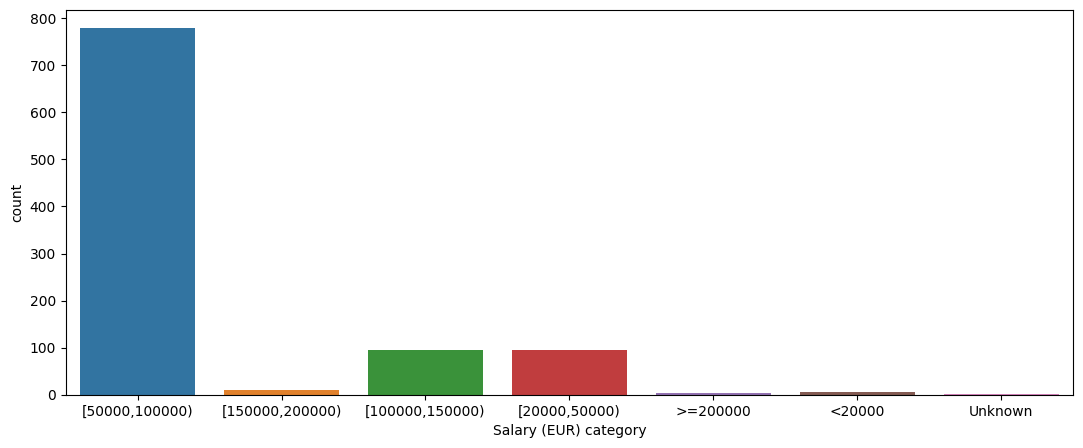

In [99]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019['Salary (EUR) category'])
plt.show()

## Kolom `Main language at work`

Melihat value pada `Main language at work`.

In [100]:
data_2019['Main language at work'].unique()

array(['English', 'Deutsch', 'English+Deutsch', 'Russian', nan, 'Spanish',
       'French', 'Italian', 'Dutch', 'Polish+English', 'Polish',
       'Ukrainian'], dtype=object)

Mengisi null values pada `Main language at work` dengan 'Unknown'.

In [101]:
data_2019['Main language at work'] = data_2019['Main language at work'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Main language at work`.

In [102]:
data_2019['Timestamp'].groupby(data_2019['Main language at work']).count().sort_values(ascending = False)

Main language at work
English            753
Deutsch            182
Russian             37
French               5
Unknown              5
Italian              2
Polish               2
Dutch                1
English+Deutsch      1
Polish+English       1
Spanish              1
Ukrainian            1
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [103]:
def language(x):
    if x == 'English' or x == 'Unknown':
        return x
    elif x == 'Deutsch':
        return 'German'
    elif x == 'English+Deutsch' or x == 'Polish+English':
        return 'English'
    else:
        return 'Other'
data_2019['Main language at work'] = data_2019['Main language at work'].apply(lambda x: language(x))

Melihat banyaknya data dari masing-masing value pada `Main language at work` setelah dikelompokkan.

In [104]:
data_2019['Timestamp'].groupby(data_2019['Main language at work']).count().sort_values(ascending = False)

Main language at work
English    755
German     182
Other       49
Unknown      5
Name: Timestamp, dtype: int64

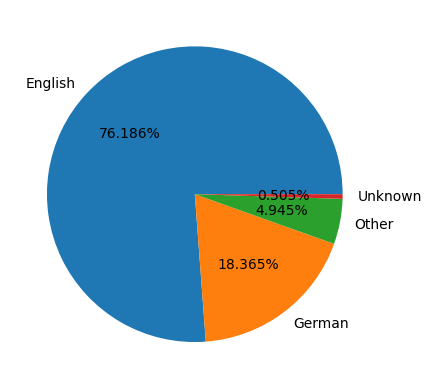

In [105]:
language_2019 = pd.DataFrame(data_2019['Timestamp'].groupby(data_2019['Main language at work'])
                             .count().reset_index())
plt.pie(language_2019['Timestamp'], labels = language_2019['Main language at work'], autopct = '%1.3f%%')
plt.show()

## Kolom `Company size`

Melihat value pada `Company size`.

In [106]:
data_2019['Company size'].unique()

array(['50-100', '10-50', '1000+', '100-1000', 'up to 10', nan],
      dtype=object)

Mengisi null values pada `Company size` dengan 'Unknown'.

In [107]:
data_2019['Company size'] = data_2019['Company size'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Company size`.

In [108]:
data_2019['Timestamp'].groupby(data_2019['Company size']).count().sort_values(ascending = False)

Company size
100-1000    366
1000+       346
50-100      132
10-50       105
up to 10     28
Unknown      14
Name: Timestamp, dtype: int64

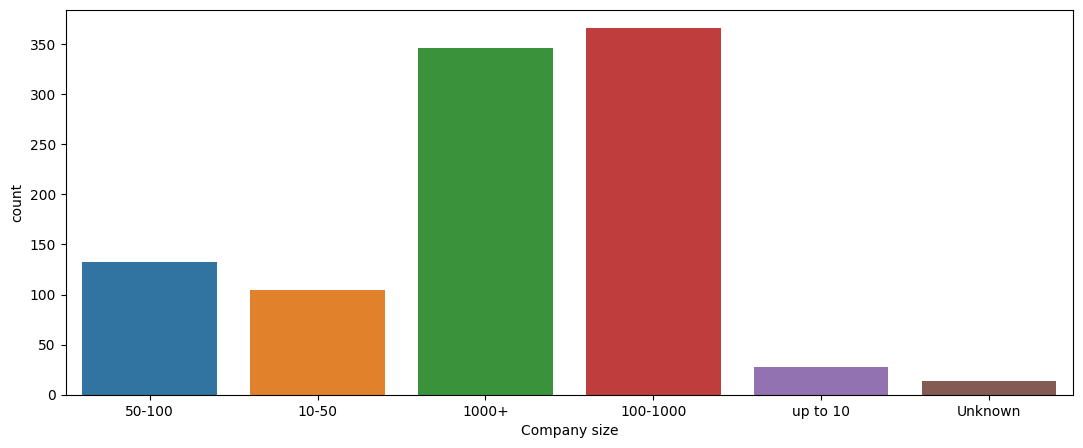

In [109]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019['Company size'])
plt.show()

## Kolom `Company type`

Melihat value pada `Company type`.

In [110]:
data_2019['Company type'].unique()

array(['Startup', 'Product', nan, 'Consulting / Agency',
       'Bodyshop / Outsource', 'University', 'Bank', 'Outsource'],
      dtype=object)

Mengisi null values pada `Company type` dengan 'Unknown'.

In [111]:
data_2019['Company type'] = data_2019['Company type'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Company type`.

In [112]:
data_2019['Timestamp'].groupby(data_2019['Company type']).count().sort_values(ascending = False)

Company type
Product                 619
Startup                 181
Consulting / Agency     117
Unknown                  31
Bodyshop / Outsource     30
Bank                      6
University                6
Outsource                 1
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [113]:
data_2019['Company type'] = data_2019['Company type'].apply(lambda x: x if (x == 'Product' or x == 'Startup'
                                                                            or x == 'Consulting / Agency'
                                                                            or x == 'Unknown') else 'Other')

Melihat banyaknya data dari masing-masing value pada `Company type` setelah dikelompokkan.

In [114]:
data_2019['Timestamp'].groupby(data_2019['Company type']).count().sort_values(ascending = False)

Company type
Product                619
Startup                181
Consulting / Agency    117
Other                   43
Unknown                 31
Name: Timestamp, dtype: int64

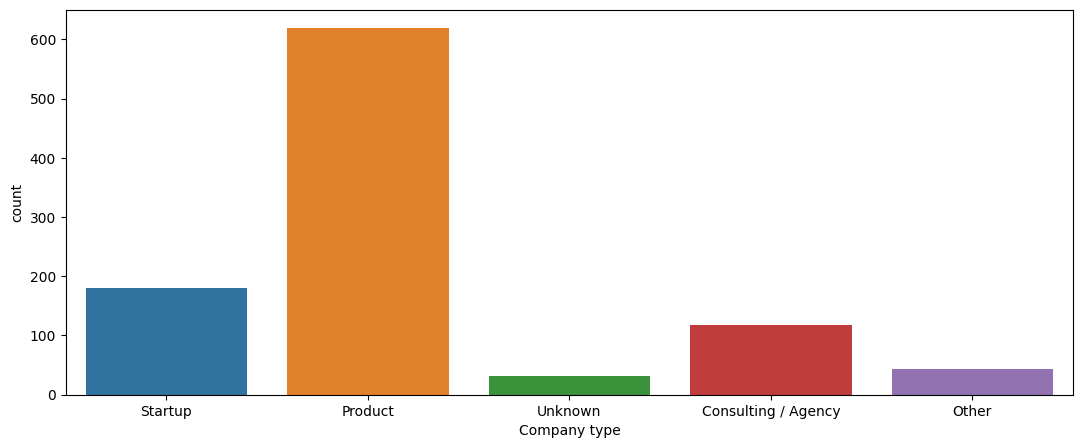

In [115]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019['Company type'])
plt.show()

## Kolom `Сontract duration`

Melihat value pada `Сontract duration`.

In [116]:
data_2019['Сontract duration'].unique()

array(['unlimited', '6 months', nan, 'more than 1 year', '1 year',
       'less than 3 months', '3 months'], dtype=object)

Mengisi null values pada `Сontract duration` dengan 'Unknown'.

In [117]:
data_2019['Сontract duration'] = data_2019['Сontract duration'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Сontract duration`.

In [118]:
data_2019['Timestamp'].groupby(data_2019['Сontract duration']).count().sort_values(ascending = False)

Сontract duration
unlimited             851
more than 1 year       59
1 year                 40
Unknown                29
6 months                7
3 months                4
less than 3 months      1
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [119]:
def duration(x):
    if x == 'Unknown':
        return x
    elif x == 'unlimited':
        return 'Unlimited contract'
    else:
        return 'Temporary contract'
data_2019['Сontract duration'] = data_2019['Сontract duration'].apply(lambda x: duration(x))

Melihat banyaknya data dari masing-masing value pada `Сontract duration` setelah dikelompokkan.

In [120]:
data_2019['Timestamp'].groupby(data_2019['Сontract duration']).count().sort_values(ascending = False)

Сontract duration
Unlimited contract    851
Temporary contract    111
Unknown                29
Name: Timestamp, dtype: int64

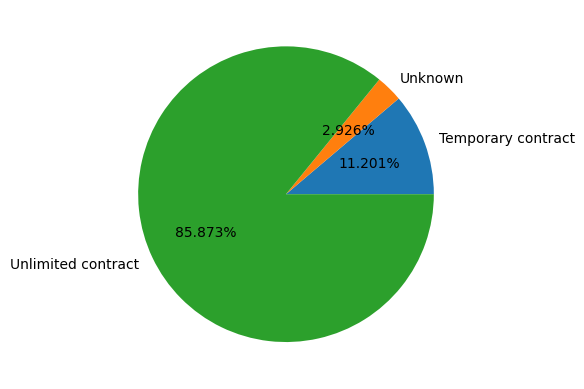

In [121]:
duration_2019 = pd.DataFrame(data_2019['Timestamp'].groupby(data_2019['Сontract duration']).count().reset_index())
plt.pie(duration_2019['Timestamp'], labels = duration_2019['Сontract duration'], autopct = '%1.3f%%')
plt.show()

## Lain-lain

Meninjau kembali null values dari `data_2019`.

In [122]:
data_2019.isna().sum()

Timestamp                                    0
Age                                        109
Gender                                       0
City                                         0
Level                                        0
Position                                     0
Years of experience                          0
Main technology or programming language      0
Salary (EUR)                                 1
Main language at work                        0
Company size                                 0
Company type                                 0
Сontract duration                            0
Age category                                 0
Years of experience category                 0
Salary (EUR) category                        0
dtype: int64

Null values pada `Age` dan `Salary (EUR)` diabaikan karena jika diisi dengan nilai lain dapat mengganggu analisis.

# Data 2020

In [123]:
data_2020.shape

(1253, 23)

`data_2020` terdiri dari 1253 baris dan 23 kolom.

Melihat preview `data_2020`.

In [124]:
data_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


Menampilkan informasi dari `data_2020`.

In [125]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

Meninjau duplicate data dari `data_2020`.

In [126]:
data_2020.duplicated().sum()

0

Meninjau null values dari `data_2020`.

In [127]:
data_2020.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

Menghapus kolom yang memuat banyak null values dan tidak akan digunakan.

In [128]:
data_2020 = data_2020.drop(['Years of experience in Germany', 'Other technologies/programming languages you use often',
                            'Yearly bonus + stocks in EUR',
                            'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                            'Annual bonus+stocks one year ago. Only answer if staying in same country',
                            'Number of vacation days',
                            'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                            'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']
                           , axis = 1)
data_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Yearly brutto salary (without bonus and stocks) in EUR,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,80000.0,Full-time employee,Unlimited contract,English,51-100,Product,No
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,80000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,120000.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,54000.0,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,62000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No


## Kolom `Age`

Melihat distribusi data dari `Age`.

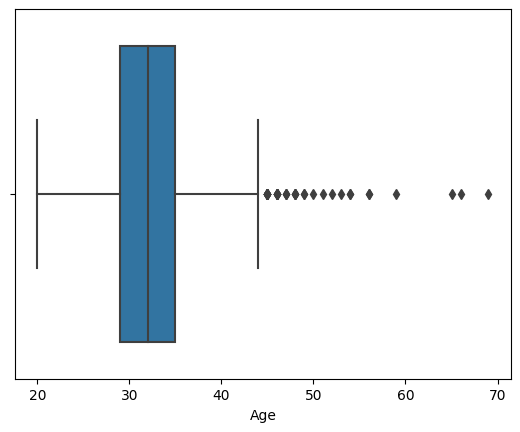

In [129]:
sns.boxplot(x = data_2020['Age'])
plt.show()

Mengelompokkan data dan memasukkan pada kolom baru serta untuk null values diisi dengan 'Unknown'.

In [130]:
def age(x):
    if x < 20:
        return '<20'
    elif x >= 20 and x < 30:
        return '[20,30)'
    elif x >= 30 and x < 40:
        return '[30,40)'
    elif x >= 40 and x < 50:
        return '[40,50)'
    elif x >= 50 and x < 60:
        return '[50,60)'
    elif x >= 60:
        return '>=60'
    else:
        return 'Unknown'
data_2020['Age category'] = data_2020['Age'].apply(lambda x: age(x))

Melihat banyaknya data dari masing-masing value pada `Age category`.

In [131]:
data_2020['Timestamp'].groupby(data_2020['Age category']).count()

Age category
>=60         3
Unknown     27
[20,30)    382
[30,40)    721
[40,50)    111
[50,60)      9
Name: Timestamp, dtype: int64

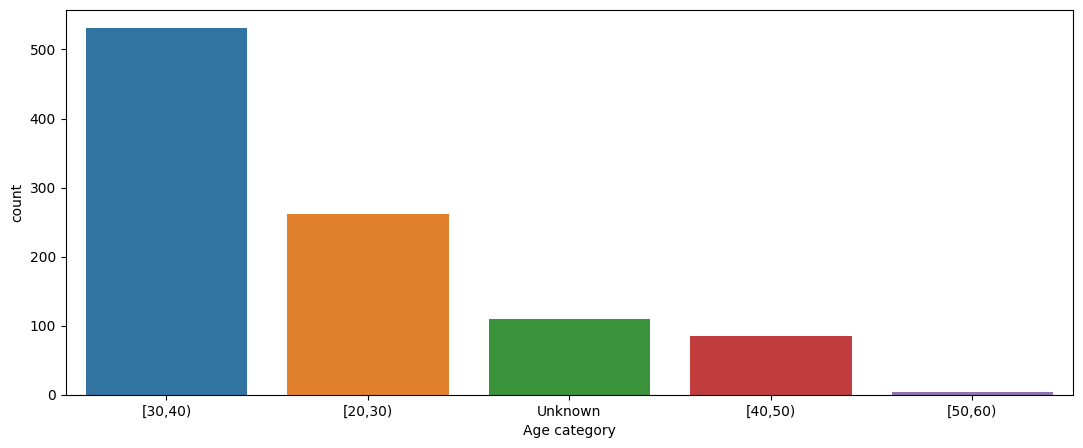

In [132]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2019['Age category'])
plt.show()

## Kolom `Gender`

Melihat value pada `Gender`.

In [133]:
data_2020['Gender'].unique()

array(['Male', 'Female', nan, 'Diverse'], dtype=object)

Mengisi null values pada `Gender` dengan 'Unknown'.

In [134]:
data_2020['Gender'] = data_2020['Gender'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Gender`.

In [135]:
data_2020['Timestamp'].groupby(data_2020['Gender']).count()

Gender
Diverse       2
Female      192
Male       1049
Unknown      10
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [136]:
data_2020['Gender'] = data_2020['Gender'].apply(lambda x: 'Unknown' if x == 'Diverse' else x)

Melihat banyaknya data dari masing-masing value pada `Gender` setelah dikelompokkan.

In [137]:
data_2020['Timestamp'].groupby(data_2020['Gender']).count()

Gender
Female      192
Male       1049
Unknown      12
Name: Timestamp, dtype: int64

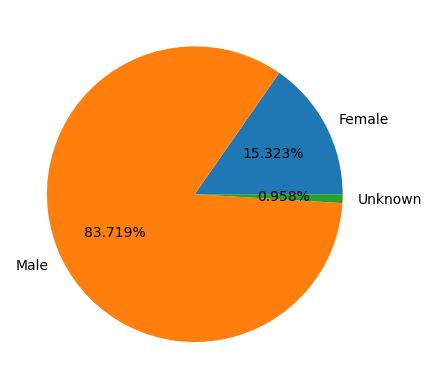

In [138]:
gender_2020 = pd.DataFrame(data_2020['Timestamp'].groupby(data_2020['Gender']).count().reset_index())
plt.pie(gender_2020['Timestamp'], labels = gender_2020['Gender'], autopct = '%1.3f%%')
plt.show()

## Kolom `City`

Melihat value pada `City`.

In [139]:
data_2020['City'].unique()

array(['Munich', 'Berlin', 'Hamburg', 'Wolfsburg', 'Stuttgart',
       'Schleswig-Holstein', 'London', 'Konstanz area', 'Frankfurt',
       'Cologne', 'Kempten', 'Münster', 'Erlangen', 'Vienna', 'Moldova',
       'Rosenheim', 'Mannheim ', 'Boeblingen', 'Düsseldorf', 'Ingolstadt',
       'Nürnberg', 'Ansbach', 'Leipzig', 'Mannheim', 'Tuttlingen', 'Bonn',
       'Moscow', 'Koblenz', 'Warsaw', 'Heidelberg', 'Karlsruhe', 'Köln',
       'Aachen', 'Karlsruhe ', 'Samara', 'Riga, Latvia', 'Dusseldorf',
       'Zurich', 'Helsinki', 'Würzburg', 'Kiev', 'Den Haag', 'Amsterdam',
       'Cracovia', 'Tallinn', 'Prague', 'Utrecht', 'Stockholm',
       'Braunschweig ', 'Dresden', 'Kyiv', 'Stuttgart ', 'Malta',
       'Lübeck', 'Nuremberg ', 'Bodensee', 'Milan', 'Salzburg', 'Rome',
       'Wroclaw', 'Cupertino', 'Paris', 'Dublin ', 'Paderborn',
       'Konstanz', 'Ulm', 'Düsseldorf ', 'Barcelona', 'Bölingen',
       'Tampere (Finland)', 'Hannover', 'Bucharest', 'Siegen', 'Minsk',
       'Nuremberg', 'M

Melihat banyaknya data dari masing-masing value pada `City` dengan top 20.

In [140]:
data_2020['Timestamp'].groupby(data_2020['City']).count().sort_values(ascending = False).head(20)

City
Berlin         681
Munich         236
Frankfurt       44
Hamburg         40
Stuttgart       26
Cologne         20
Amsterdam        9
Stuttgart        7
Düsseldorf       6
Prague           6
Moscow           6
Karlsruhe        6
London           5
Zurich           5
Stockholm        5
Heidelberg       4
Düsseldorf       4
Nürnberg         4
Helsinki         4
Dusseldorf       3
Name: Timestamp, dtype: int64

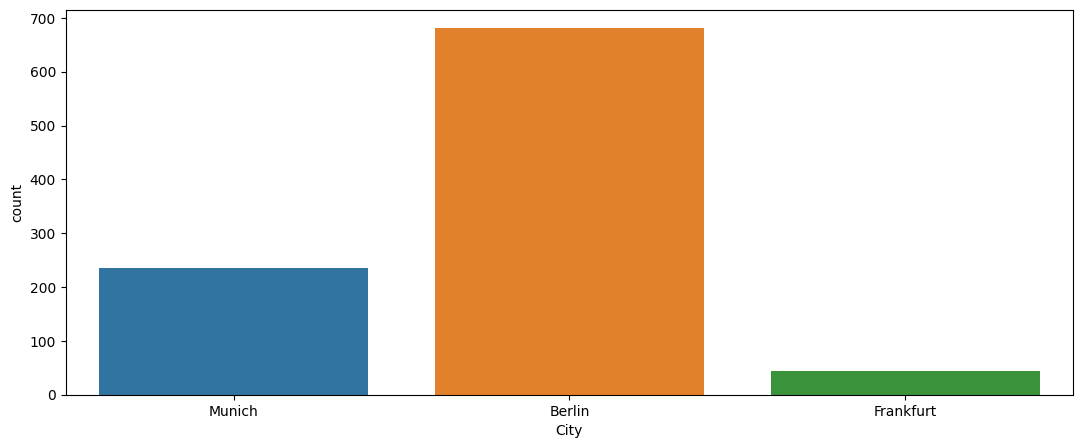

In [141]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020[(data_2020['City'] == 'Berlin') | (data_2020['City'] == 'Munich') |
                            (data_2020['City'] == 'Frankfurt')]['City'])
plt.show()

## Kolom `Position `

Rename `Position ` menjadi `Position`.

In [142]:
data_2020 = data_2020.rename(columns = {'Position ': 'Position'})

Melihat value pada `Position`.

In [143]:
data_2020['Position'].unique()

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Designer (UI/UX)', 'Product Manager',
       'Mobile Developer', 'Software Architect', 'Team Lead',
       'Test manager', 'QA Engineer', 'Data Scientist',
       'Hardware Engineer', 'Engineering Manager', 'Analytics engineer',
       'Localization producer', 'Reporting Engineer', 'Account Managet',
       'agile master ', 'ML Engineer', 'Solution Architect',
       'BI Consultant', 'Fullstack Developer', nan, 'Cloud Architect',
       'System Administrator', 'Project Manager', 'Network Engineer ',
       'VP Engineering', 'Agile Coach', 'Data Science Manager',
       'Scrum Master', 'Firmware Engineer', 'Solutions Architect',
       'Data Center Manager', 'C/C++/Java developer', 'DevOps Manager',
       'Tech Lead', 'Network Administrator', 'Security Manager',
       'Consultant Data Analytics', 'BI IT Consultant',
       'Graphic Designer', 'iOS Developer', 'Banker', 'Cloud Engi

Mengisi null values pada `Position` dengan 'Unknown'.

In [144]:
data_2020['Position'] = data_2020['Position'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Position` dengan top 20.

In [145]:
data_2020['Timestamp'].groupby(data_2020['Position']).count().sort_values(ascending = False).head(20)

Position
Software Engineer      387
Backend Developer      174
Data Scientist         110
Frontend Developer      89
QA Engineer             71
DevOps                  57
Mobile Developer        53
ML Engineer             42
Product Manager         39
Data Engineer           25
Designer (UI/UX)        16
Engineering Manager     10
Data Analyst             8
Unknown                  6
CTO                      5
Project Manager          4
Software Architect       4
Fullstack Developer      4
SRE                      4
Team Lead                3
Name: Timestamp, dtype: int64

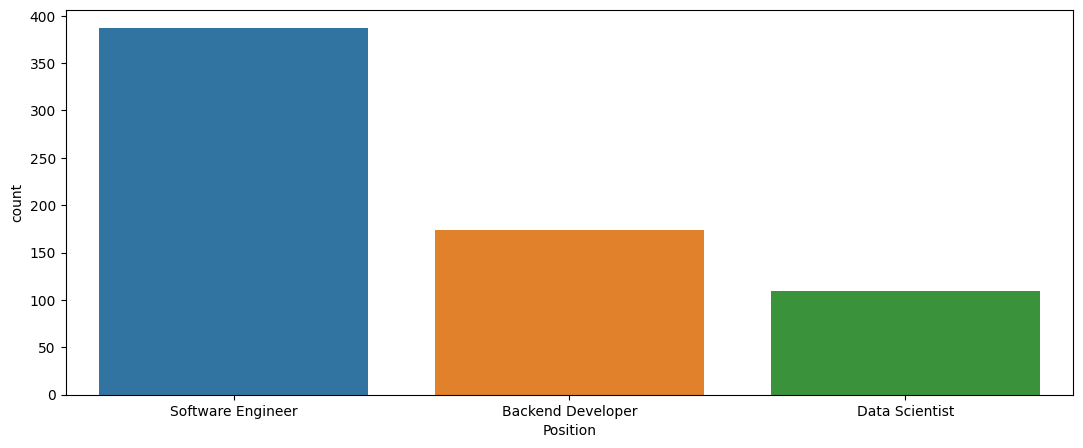

In [146]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020[(data_2020['Position'] == 'Software Engineer') |
                            (data_2020['Position'] == 'Backend Developer') |
                            (data_2020['Position'] == 'Data Scientist')]['Position'])
plt.show()

## Kolom `Total years of experience`

Melihat value dari `Total years of experience`.

In [147]:
data_2020['Total years of experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

Melihat banyaknya data dari masing-masing value pada `Total years of experience`.

In [148]:
data_2020['Timestamp'].groupby(data_2020['Total years of experience']).count().sort_values(ascending = False)

Total years of experience
10                                                     138
5                                                      136
6                                                       99
8                                                       92
7                                                       84
4                                                       80
12                                                      67
3                                                       66
15                                                      63
9                                                       60
2                                                       57
11                                                      43
13                                                      41
14                                                      39
1                                                       31
20                                                      28
16                            

Mengonversi data ke float.

In [149]:
def experience(x):
    if x == '0' or x == 'less than year':
        return 1
    elif x == '6 (not as a data scientist, but as a lab scientist)':
        return 6
    elif x == '1,5':
        return 1.5
    elif x == '383':
        return 38
    elif x == '2,5':
        return 2.5
    elif x == '15, thereof 8 as CTO':
        return 15
    elif x == '1 (as QA Engineer) / 11 in total':
        return 11
    else:
        return x
data_2020['Total years of experience'] = data_2020['Total years of experience'].apply(lambda x: float(experience(x)))

Melihat distribusi data dari `Total years of experience`.

<AxesSubplot: xlabel='Total years of experience'>

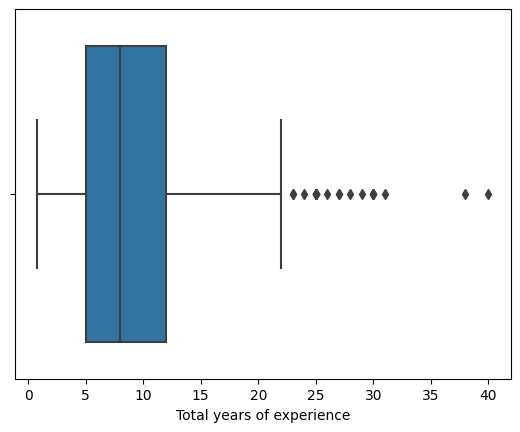

In [150]:
sns.boxplot(x = data_2020['Total years of experience'])

Rename `Total years of experience` menjadi `Years of experience`.

In [151]:
data_2020 = data_2020.rename(columns = {'Total years of experience': 'Years of experience'})
data_2020.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Seniority level,Your main technology / programming language,Yearly brutto salary (without bonus and stocks) in EUR,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,Age category
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,Senior,TypeScript,80000.0,Full-time employee,Unlimited contract,English,51-100,Product,No,"[20,30)"
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,Senior,Ruby,80000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[20,30)"
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,Lead,Javascript / Typescript,120000.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,"[20,30)"
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,Junior,Javascript,54000.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,"[20,30)"
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,Senior,C# .NET,62000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[30,40)"


Mengelompokkan data dan memasukkan pada kolom baru serta untuk null values diisi dengan 'Unknown'.

In [152]:
def experience(x):
    if x < 5:
        return '<5'
    elif x >= 5 and x < 10:
        return '[5,10)'
    elif x >= 10 and x < 20:
        return '[10,20)'
    elif x >= 20 and x < 30:
        return '[20,30)'
    elif x >= 30:
        return '>=30'
    else:
        return 'Unknown'
data_2020['Years of experience category'] = data_2020['Years of experience'].apply(lambda x: experience(x))

Melihat banyaknya data dari masing-masing value pada `Years of experience category`.

In [153]:
data_2020['Timestamp'].groupby(data_2020['Years of experience category']).count()

Years of experience category
<5         256
>=30         7
Unknown     16
[10,20)    448
[20,30)     51
[5,10)     475
Name: Timestamp, dtype: int64

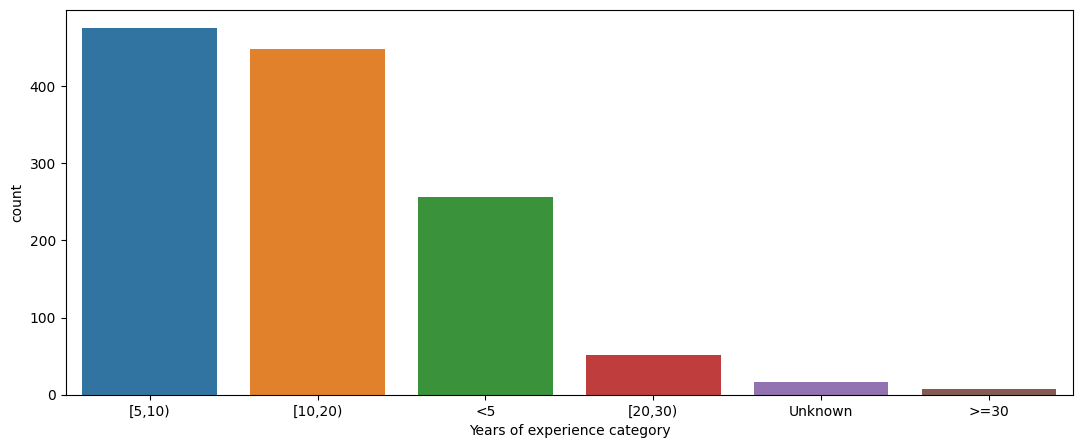

In [154]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020['Years of experience category'])
plt.show()

## Kolom `Seniority level`

Melihat value pada `Seniority level`.

In [155]:
data_2020['Seniority level'].unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'VP', 'Manager', 'Work Center Manager', 'CTO', 'No level ',
       'Director', 'Key', 'C-level executive manager', 'Principal',
       'intern', 'Student', 'no idea, there are no ranges in the firm ',
       'C-Level', 'Working Student', 'Entry level', 'Intern', 'student',
       'Self employed'], dtype=object)

Mengisi null values pada `Seniority level` dengan 'Unknown.

In [156]:
data_2020['Seniority level'] = data_2020['Seniority level'].fillna('Unknown')

Rename `Seniority level` menjadi `Level`.

In [157]:
data_2020 = data_2020.rename(columns = {'Seniority level': 'Level'})
data_2020.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Level,Your main technology / programming language,Yearly brutto salary (without bonus and stocks) in EUR,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,Age category,Years of experience category
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,Senior,TypeScript,80000.0,Full-time employee,Unlimited contract,English,51-100,Product,No,"[20,30)","[5,10)"
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,Senior,Ruby,80000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[20,30)","[5,10)"
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,Lead,Javascript / Typescript,120000.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,"[20,30)","[10,20)"
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,Junior,Javascript,54000.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,"[20,30)",<5
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,Senior,C# .NET,62000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[30,40)","[10,20)"


Melihat banyaknya data dari masing-masing value pada `Level`.

In [158]:
data_2020['Timestamp'].groupby(data_2020['Level']).count().sort_values(ascending = False)

Level
Senior                                       565
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Unknown                                       12
Principal                                      3
C-Level                                        1
Self employed                                  1
no idea, there are no ranges in the firm       1
intern                                         1
Working Student                                1
Work Center Manager                            1
VP                                             1
Student                                        1
No level                                       1
No level                                       1
C-level executive manager                      1
Manager                                        1
Key                                            1
Intern        

Mengelompokkan data.

In [159]:
def level(x):
    if x == 'Principal':
        return 'Head'
    elif x == 'Senior' or x == 'Middle' or x == 'Lead' or x == 'Junior' or x == 'Head' or x == 'Unknown':
        return x
    else:
        return 'Other'
data_2020['Level'] = data_2020['Level'].apply(lambda x: level(x))

Melihat banyaknya data dari masing-masing value pada `Level` setelah dikelompokkan.

In [160]:
data_2020['Timestamp'].groupby(data_2020['Level']).count().sort_values(ascending = False)

Level
Senior     565
Middle     366
Lead       166
Junior      79
Head        47
Other       18
Unknown     12
Name: Timestamp, dtype: int64

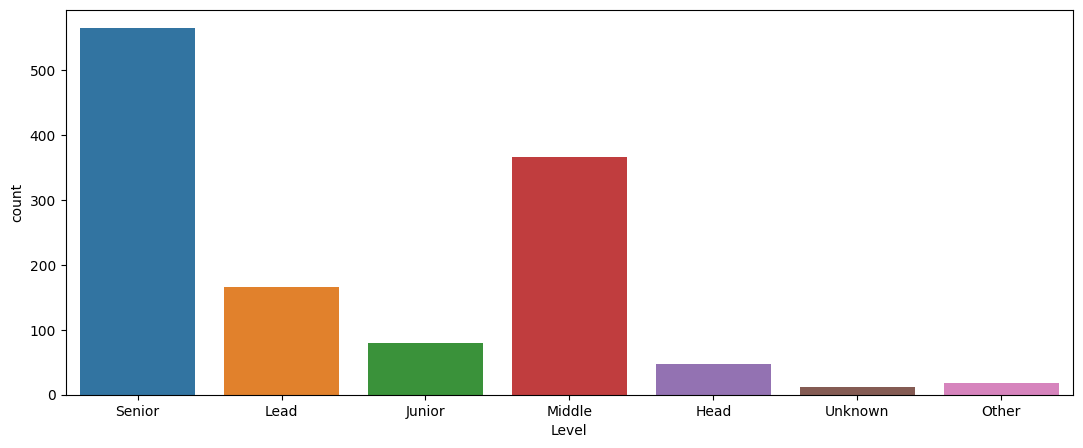

In [161]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020['Level'])
plt.show()

## Kolom `Your main technology / programming language`

Melihat value pada `Your main technology / programming language`.

In [162]:
data_2020['Your main technology / programming language'].unique()

array(['TypeScript', 'Ruby', 'Javascript / Typescript', 'Javascript',
       'C# .NET', 'AWS, GCP, Python,K8s', 'Typescript', 'PHP', 'Java',
       'Aws Hadoop Postgre Typescript', 'C++', nan, 'Kotlin', 'kotlin',
       'NodeJS', 'iOS', 'Kubernetes', 'Charles', 'SQL', 'Go', 'java',
       'Python', 'Figma', 'JavaScript', 'Go/Python', 'React', 'С#', 'Php',
       'ruby on rails', 'JavaScript/ES6', '.NET', 'Hardware', 'C#',
       'Google Cloud Platform', 'Js', 'android', 'JavaScript ', 'Scala',
       'python', 'C#, .net core', 'VHDL', 'Power BI', 'PHP ', 'none',
       'Android', 'Swift', 'ML', 'php', 'Scala, React.js', 'Ml/Python',
       'JavaScript/TypeScript', 'Ruby on Rails', 'Azure, SAP', 'Frontend',
       'Java, JavaScript', 'yaml', 'Python ', 'JS', 'Java ', '-', 'Agile',
       'C', 'TypeScript, JavaScript', 'Pegasystems platform ',
       'C++, Java, Embedded C', 'Cloud', 'DC Management', '--', 'SWIFT',
       'Java, angular, Aws', 'Swift, objective-c', 'Golang', 'go',
      

Melihat banyaknya data dari masing-masing value pada `Your main technology / programming language`.

In [163]:
(data_2020['Timestamp'].groupby(data_2020['Your main technology / programming language'])
 .count().sort_values(ascending = False))

Your main technology / programming language
Java            184
Python          164
PHP              56
C++              38
JavaScript       34
               ... 
Js, reactJS       1
Kotlin            1
Kotlin, Java      1
Kotlin/PHP        1
С#                1
Name: Timestamp, Length: 256, dtype: int64

Karena banyaknya value yang berbeda dan sulit untuk dikelompokkan maka untuk saat ini kolom `Your main technology / programming language` tidak digunakan.

In [164]:
data_2020 = data_2020.drop(['Your main technology / programming language'], axis = 1)
data_2020.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Level,Yearly brutto salary (without bonus and stocks) in EUR,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,Age category,Years of experience category
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,Senior,80000.0,Full-time employee,Unlimited contract,English,51-100,Product,No,"[20,30)","[5,10)"
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,Senior,80000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[20,30)","[5,10)"
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,Lead,120000.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,"[20,30)","[10,20)"
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,"[20,30)",<5
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,Senior,62000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[30,40)","[10,20)"


## Kolom `Yearly brutto salary (without bonus and stocks) in EUR`

Rename `Yearly brutto salary (without bonus and stocks) in EUR` menjadi `Salary (EUR)`.

In [165]:
data_2020 = data_2020.rename(columns = {'Yearly brutto salary (without bonus and stocks) in EUR': 'Salary (EUR)'})
data_2020.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Level,Salary (EUR),Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,Age category,Years of experience category
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,Senior,80000.0,Full-time employee,Unlimited contract,English,51-100,Product,No,"[20,30)","[5,10)"
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,Senior,80000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[20,30)","[5,10)"
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,Lead,120000.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,"[20,30)","[10,20)"
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,"[20,30)",<5
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,Senior,62000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,"[30,40)","[10,20)"


Melihat distribusi data dari `Salary (EUR)`.

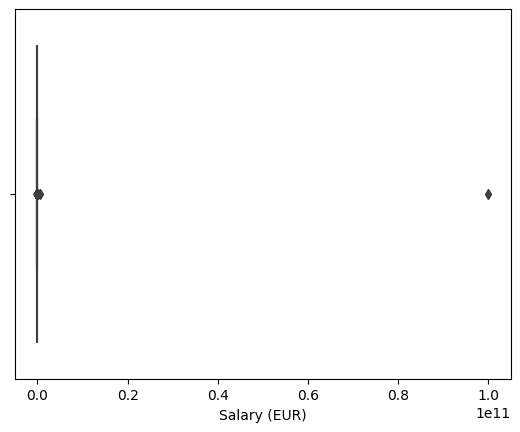

In [166]:
sns.boxplot(x = data_2020['Salary (EUR)'])
plt.show()

Melihat top 5 `Salary (EUR)`.

In [167]:
data_2020['Salary (EUR)'].sort_values(ascending = False).head()

473    1.000000e+11
853    5.000000e+08
778    8.500000e+05
576    3.000000e+05
630    2.500000e+05
Name: Salary (EUR), dtype: float64

Menghapus hasil survey dengan `Salary (EUR)` di atas 500000 karena dapat mempengaruhi analisis. Hal ini dilakukan karena setelah ditinjau ulang data pada hasil survey 2018, 2019, dan 2020 pada umumnya `Salary (EUR)` tidak melewati 300000.

In [168]:
data_2020 = data_2020.drop(data_2020[data_2020['Salary (EUR)'] > 500000].index)

Melihat distribusi data dari `Salary (EUR)` setelah menghapus tiga data survey dengan `Salary (EUR)` yang sangat tinggi.

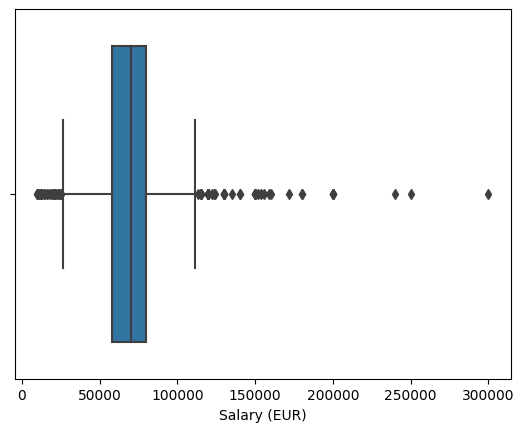

In [169]:
sns.boxplot(x = data_2020['Salary (EUR)'])
plt.show()

Mengelompokkan data dan memasukkannya pada kolom baru.

In [170]:
def salary(x):
    if x < 20000:
        return '<20000'
    elif x >= 20000 and x < 50000:
        return '[20000,50000)'
    elif x >= 50000 and x < 100000:
        return '[50000,100000)'
    elif x >= 100000 and x < 150000:
        return '[100000,150000)'
    elif x >= 150000 and x < 200000:
        return '[150000,200000)'
    else:
        return '>=200000'
data_2020['Salary (EUR) category'] = data_2020['Salary (EUR)'].apply(lambda x: salary(x))

Melihat banyaknya data dari masing-masing value pada `Salary (EUR) category`.

In [171]:
data_2020['Timestamp'].groupby(data_2020['Salary (EUR) category']).count()

Salary (EUR) category
<20000              13
>=200000             7
[100000,150000)     86
[150000,200000)     13
[20000,50000)      132
[50000,100000)     999
Name: Timestamp, dtype: int64

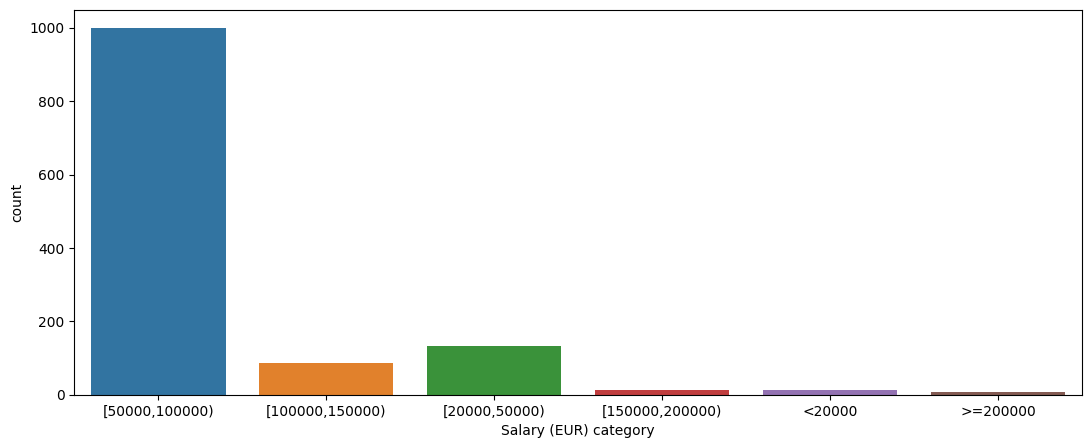

In [172]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020['Salary (EUR) category'])
plt.show()

## Kolom `Employment status`

Melihat value pada `Employment status`.

In [173]:
data_2020['Employment status'].unique()

array(['Full-time employee', 'Self-employed (freelancer)',
       'Company Director', nan, 'Founder', 'Part-time employee',
       'working student', 'Working Student',
       'Full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'Intern',
       "full-time, but 32 hours per week (it was my request, I'm a student)",
       'Werkstudent'], dtype=object)

Mengisi null values pada `Employment status` dengan 'Unknown'.

In [174]:
data_2020['Employment status'] = data_2020['Employment status'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Employment status`.

In [175]:
data_2020['Timestamp'].groupby(data_2020['Employment status']).count().sort_values(ascending = False)

Employment status
Full-time employee                                                                 1188
Self-employed (freelancer)                                                           28
Unknown                                                                              16
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
Werkstudent                                                                           1
Working Student                                                                       1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
working studen

Mengelompokkan data.

In [176]:
def status(x):
    if (x == 'Company Director' or x == 'Full-time position, part-time position, & self-employed (freelancing, tutoring)'
        or x == "full-time, but 32 hours per week (it was my request, I'm a student)"):
        return 'Full-time employee'
    elif x == 'Intern' or x == 'Werkstudent' or x == 'Working Student' or x == 'working student':
        return 'Part-time employee'
    else:
        return x
data_2020['Employment status'] = data_2020['Employment status'].apply(lambda x: status(x))

Melihat banyaknya data dari masing-masing value pada `Employment status` setelah dikelompokkan.

In [177]:
data_2020['Timestamp'].groupby(data_2020['Employment status']).count().sort_values(ascending = False)

Employment status
Full-time employee            1191
Self-employed (freelancer)      28
Unknown                         16
Part-time employee              12
Founder                          3
Name: Timestamp, dtype: int64

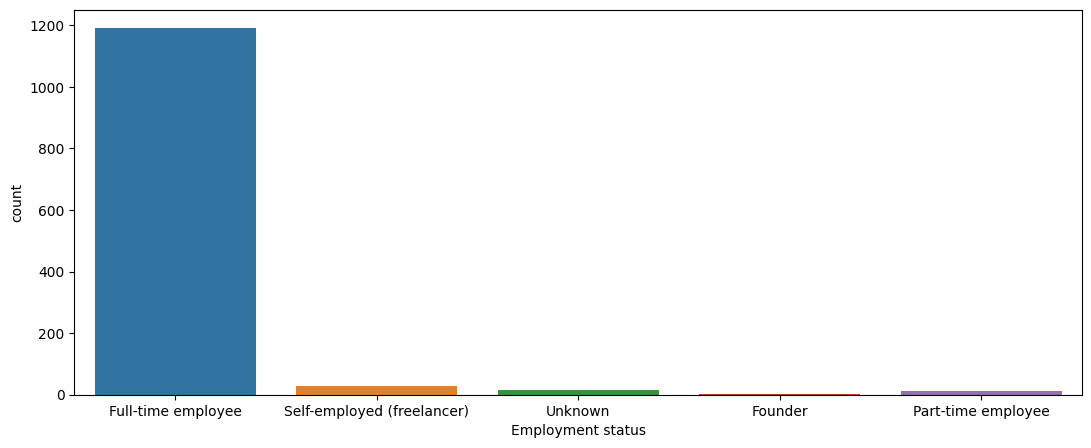

In [178]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020['Employment status'])
plt.show()

## Kolom `Сontract duration`

Melihat value pada `Сontract duration`.

In [179]:
data_2020['Сontract duration'].unique()

array(['Unlimited contract', 'Temporary contract', nan, '0'], dtype=object)

Mengisi null values pada `Сontract duration` dengan 'Unknown'.

In [180]:
data_2020['Сontract duration'] = data_2020['Сontract duration'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Сontract duration`.

In [181]:
data_2020['Timestamp'].groupby(data_2020['Сontract duration']).count().sort_values(ascending = False)

Сontract duration
Unlimited contract    1157
Temporary contract      64
Unknown                 28
0                        1
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [182]:
data_2020['Сontract duration'] = data_2020['Сontract duration'].apply(lambda x: 'Unknown' if x == '0' else x)

Melihat banyaknya data dari masing-masing value pada `Сontract duration` setelah dikelompokkan.

In [183]:
data_2020['Timestamp'].groupby(data_2020['Сontract duration']).count().sort_values(ascending = False)

Сontract duration
Unlimited contract    1157
Temporary contract      64
Unknown                 29
Name: Timestamp, dtype: int64

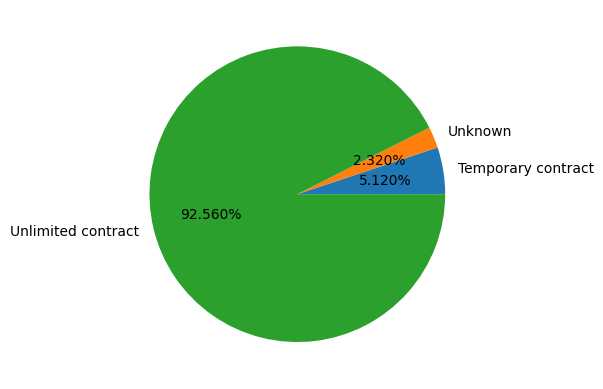

In [184]:
duration_2020 = pd.DataFrame(data_2020['Timestamp'].groupby(data_2020['Сontract duration']).count().reset_index())
plt.pie(duration_2020['Timestamp'], labels = duration_2020['Сontract duration'], autopct = '%1.3f%%')
plt.show()

## Kolom `Main language at work`

Melihat value pada `Main language at work`.

In [185]:
data_2020['Main language at work'].unique()

array(['English', 'German', nan, 'English and German', 'Russian',
       'Polish', '50/50', 'Русский', 'Czech', 'Italian', 'Deuglisch',
       'French', 'both', 'Spanish', 'Russian, English'], dtype=object)

Mengisi null values pada `Main language at work` dengan 'Unknown'.

In [186]:
data_2020['Main language at work'] = data_2020['Main language at work'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Main language at work`.

In [187]:
data_2020['Timestamp'].groupby(data_2020['Main language at work']).count().sort_values(ascending = False)

Main language at work
English               1018
German                 186
Unknown                 15
Russian                 12
Italian                  3
Spanish                  3
Czech                    2
English and German       2
Polish                   2
Русский                  2
50/50                    1
Deuglisch                1
French                   1
Russian, English         1
both                     1
Name: Timestamp, dtype: int64

Mengelompokkan data.

In [188]:
def language(x):
    if x == 'English' or x == 'German' or x == 'Unknown':
        return x
    elif x == 'English and German' or x == '50/50' or x == 'both' or x == 'Russian, English':
        return 'English'
    else:
        return 'Other'
data_2020['Main language at work'] = data_2020['Main language at work'].apply(lambda x: language(x))

Melihat banyaknya data dari masing-masing value pada `Main language at work`.

In [189]:
data_2020['Timestamp'].groupby(data_2020['Main language at work']).count().sort_values(ascending = False)

Main language at work
English    1023
German      186
Other        26
Unknown      15
Name: Timestamp, dtype: int64

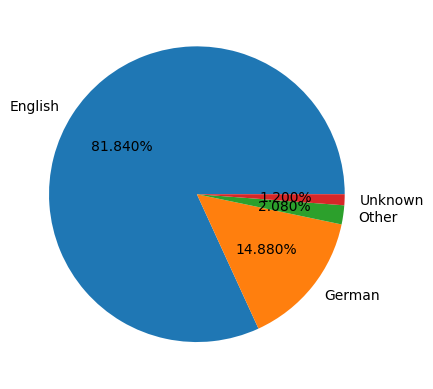

In [190]:
language_2020 = pd.DataFrame(data_2020['Timestamp'].groupby(data_2020['Main language at work'])
                             .count().reset_index())
plt.pie(language_2020['Timestamp'], labels = language_2020['Main language at work'], autopct = '%1.3f%%')
plt.show()

## Kolom `Company size`

Melihat value pada `Company size`.

In [191]:
data_2020['Company size'].unique()

array(['51-100', '101-1000', '11-50', '1000+', nan, 'up to 10'],
      dtype=object)

Mengisi null values pada `Company size` dengan 'Unknown'.

In [192]:
data_2020['Company size'] = data_2020['Company size'].fillna('Unknown')

Membuat value menjadi konsisten dengan value pada survey 2018 dan 2019.

In [193]:
def company_size(x):
    if x == '11-50':
        return '10-50'
    elif x == '51-100':
        return '50-100'
    elif x == '101-1000':
        return '100-1000'
    else:
        return x
data_2020['Company size'] = data_2020['Company size'].apply(lambda x: company_size(x))

Melihat banyaknya data dari masing- masing value pada `Company size`.

In [194]:
data_2020['Timestamp'].groupby(data_2020['Company size']).count().sort_values(ascending = False)

Company size
1000+       448
100-1000    404
10-50       174
50-100      147
up to 10     60
Unknown      17
Name: Timestamp, dtype: int64

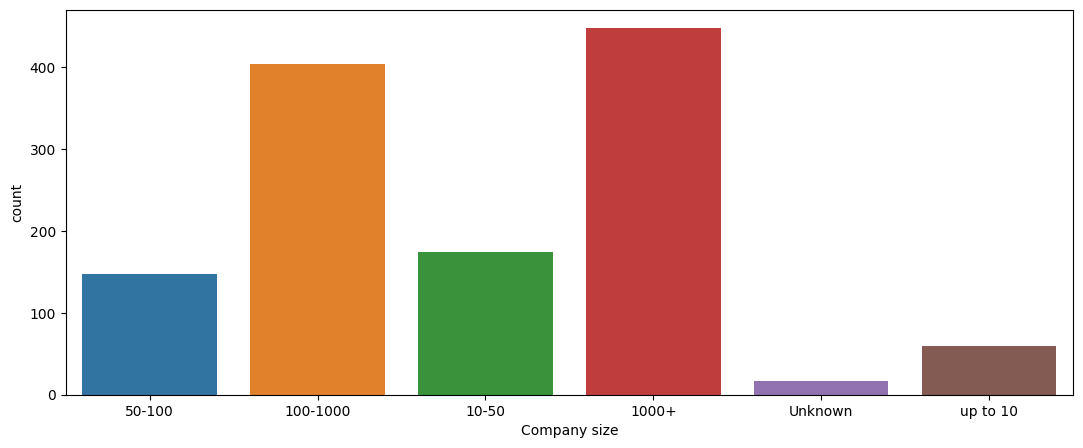

In [195]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020['Company size'])
plt.show()

## Kolom `Company type`

Melihat value pada `Company type`.

In [196]:
data_2020['Company type'].unique()

array(['Product', 'Startup', 'Consulting / Agency', nan, 'Media',
       'Personal Ltd', 'Cloud', 'Behörde', 'Construction',
       'Big commercial', 'Outsorce', 'Bank ', 'Fintech', 'Automotive',
       'Bank', 'IT Department of established business',
       'Telecommunications', 'E-commerce', 'Systemhaus', 'University',
       'consumer goods', 'IT-Outsourcing', 'Game Company', 'Financial ',
       'Corporation', 'Publishing and Technology', 'Market Research ',
       'e-commerce', 'SaaS', 'Publisher', 'Energy ', 'Enterprise',
       'Bloody enterprise', 'service', 'Concern', 'Utilities',
       'Insurance', 'Science Institute ', 'Research institute', 'Retail',
       'Ecommerce', 'E-Commerce', 'Semiconductor', 'Automotive ',
       'Institute', 'Finance', 'Handel ', 'Consulting and Product',
       'Education', 'Pharma',
       'Full-time position in Education, part-time position in at a data startup',
       'Corporation ', 'Transport & Logistics', 'Biergarten ',
       'Non-tech re

Mengisi null values pada `Company type` dengan 'Unknown'.

In [197]:
data_2020['Company type'] = data_2020['Company type'].fillna('Unknown')

Melihat banyaknya data dari masing-masing value pada `Company type`.

In [198]:
data_2020['Timestamp'].groupby(data_2020['Company type']).count().sort_values(ascending = False)

Company type
Product                759
Startup                251
Consulting / Agency    142
Unknown                 24
Bank                     5
                      ... 
IT-Outsourcing           1
Industry                 1
Institute                1
Automotive               1
service                  1
Name: Timestamp, Length: 64, dtype: int64

Mengelompokkan data.

In [199]:
def company(x):
    if x == 'Product' or x == 'Startup' or x == 'Consulting / Agency' or x == 'Unknown':
        return x
    else:
        return 'Other'
data_2020['Company type'] = data_2020['Company type'].apply(lambda x: company(x))

Melihat banyaknya data dari masing-masing value pada `Company type` setelah dikelompokkan.

In [200]:
data_2020['Timestamp'].groupby(data_2020['Company type']).count().sort_values(ascending = False)

Company type
Product                759
Startup                251
Consulting / Agency    142
Other                   74
Unknown                 24
Name: Timestamp, dtype: int64

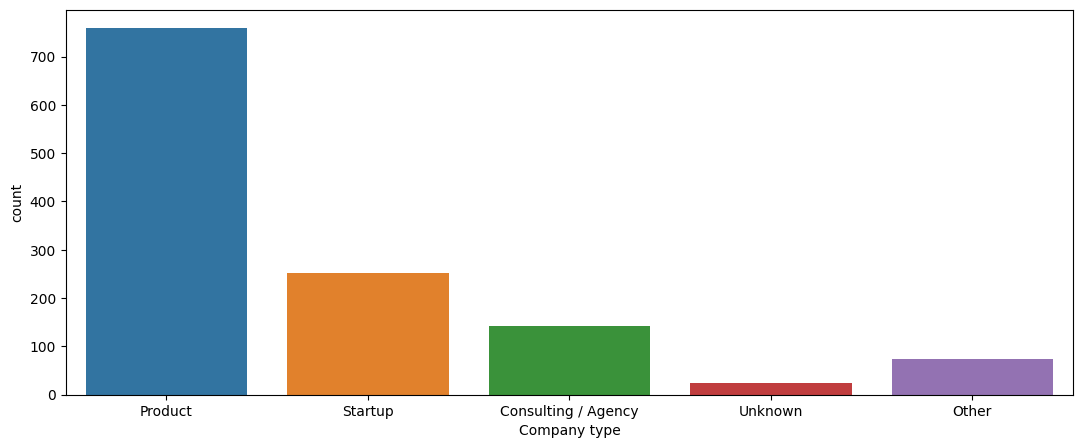

In [201]:
plt.figure(figsize = (13, 5))
sns.countplot(x = data_2020['Company type'])
plt.show()

## Kolom `Have you lost your job due to the coronavirus outbreak?`

Melihat value pada `Have you lost your job due to the coronavirus outbreak?`.

In [202]:
data_2020['Have you lost your job due to the coronavirus outbreak?'].unique()

array(['No', 'Yes',
       "i didn't but will be looking for new one because of covid", nan,
       'kurzarbeitzeit for 1.5 months',
       'Have been a freelancer at the beginning of year',
       'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months',
       'Lost the job but for different reason',
       'Leads and project inquiries have slowed down',
       'Laid off for a bit',
       'yes but found a new one with better pay / perks'], dtype=object)

Mengisi null values pada `Have you lost your job due to the coronavirus outbreak?` dengan 'Unknown'.

In [203]:
data_2020['Have you lost your job due to the coronavirus outbreak?'] = (data_2020['Have you lost your job due to the coronavirus outbreak?']
                                                                        .fillna('Unknown'))

Rename `Have you lost your job due to the coronavirus outbreak?` dengan `Lost job due to the coronavirus outbreak`.

In [204]:
data_2020 = data_2020.rename(columns = {'Have you lost your job due to the coronavirus outbreak?':
                                        'Lost job due to the coronavirus outbreak'})
data_2020.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Level,Salary (EUR),Employment status,Сontract duration,Main language at work,Company size,Company type,Lost job due to the coronavirus outbreak,Age category,Years of experience category,Salary (EUR) category
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,Senior,80000.0,Full-time employee,Unlimited contract,English,50-100,Product,No,"[20,30)","[5,10)","[50000,100000)"
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,Senior,80000.0,Full-time employee,Unlimited contract,English,100-1000,Product,No,"[20,30)","[5,10)","[50000,100000)"
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,Lead,120000.0,Self-employed (freelancer),Temporary contract,English,100-1000,Product,Yes,"[20,30)","[10,20)","[100000,150000)"
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,Full-time employee,Unlimited contract,English,50-100,Startup,No,"[20,30)",<5,"[50000,100000)"
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,Senior,62000.0,Full-time employee,Unlimited contract,English,100-1000,Product,No,"[30,40)","[10,20)","[50000,100000)"


Melihat banyaknya data dari masing-masing value pada `Lost job due to the coronavirus outbreak`.

In [205]:
(data_2020['Timestamp'].groupby(data_2020['Lost job due to the coronavirus outbreak'])
 .count().sort_values(ascending = False))

Lost job due to the coronavirus outbreak
No                                                                                        1161
Yes                                                                                         62
Unknown                                                                                     19
Have been a freelancer at the beginning of year                                              1
Laid off for a bit                                                                           1
Leads and project inquiries have slowed down                                                 1
Lost the job but for different reason                                                        1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
yes but f

Mengelompokkan data.

In [206]:
def lost_job(x):
    if x == 'No' or x == 'Yes' or x == 'Unknown':
        return x
    elif (x == 'Have been a freelancer at the beginning of year' or x == 'Laid off for a bit'
          or x == 'Lost the job but for different reason' or x == 'yes but found a new one with better pay / perks'):
        return 'Yes'
    else:
        return 'No'
data_2020['Lost job due to the coronavirus outbreak'] = (data_2020['Lost job due to the coronavirus outbreak']
                                                                        .apply(lambda x: lost_job(x)))

Melihat banyaknya data dari masing-masing value pada `Lost job due to the coronavirus outbreak` setelah dikelompokkan.

In [207]:
(data_2020['Timestamp'].groupby(data_2020['Lost job due to the coronavirus outbreak'])
 .count().sort_values(ascending = False))

Lost job due to the coronavirus outbreak
No         1165
Yes          66
Unknown      19
Name: Timestamp, dtype: int64

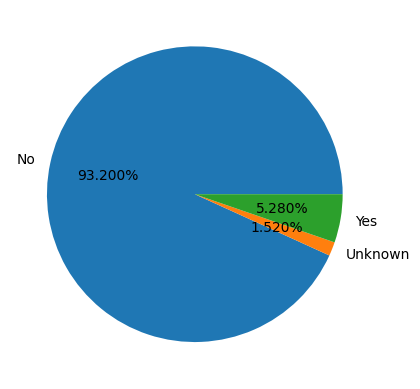

In [208]:
coronavirus = pd.DataFrame(data_2020['Timestamp'].groupby(data_2020['Lost job due to the coronavirus outbreak'])
                           .count().reset_index())
plt.pie(coronavirus['Timestamp'], labels = coronavirus['Lost job due to the coronavirus outbreak'],
        autopct = '%1.3f%%')
plt.show()

## Lain-lain

Meninjau kembali null values dari `data_2020`.

In [209]:
data_2020.isna().sum()

Timestamp                                    0
Age                                         26
Gender                                       0
City                                         0
Position                                     0
Years of experience                         15
Level                                        0
Salary (EUR)                                 0
Employment status                            0
Сontract duration                            0
Main language at work                        0
Company size                                 0
Company type                                 0
Lost job due to the coronavirus outbreak     0
Age category                                 0
Years of experience category                 0
Salary (EUR) category                        0
dtype: int64

Null values pada `Age` dan `Years of experience` diabaikan karena jika diisi dengan nilai lain dapat mengganggu analisis.

# Mengunduh data siap pakai

In [210]:
data_2018.to_csv('IT-Salary-Survey-EU-2018-(Siap-Pakai).csv', index = False)

In [211]:
data_2019.to_csv('IT-Salary-Survey-EU-2019-(Siap-Pakai).csv', index = False)

In [212]:
data_2020.to_csv('IT-Salary-Survey-EU-2020-(Siap-Pakai).csv', index = False)